<a href="https://colab.research.google.com/github/sjsoumil/EDA/blob/main/21BDS0247_EDA_Soumil_Jain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Soumil Jain 21BDS0247 - Theory **DA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# First we will do data preprocessing that means
#1 datacleaning- removing unnecessay rows and columns
#2 Handling Missing data
#After the above steps we can start our EDA

In [ ]:
df=pd.read_csv("data_EDA.csv")
df.head()

rownames              vote  age  economic.cond.national  \
0         1  Liberal Democrat   43                       3   
1         2            Labour   36                       4   
2         3            Labour   35                       4   
3         4            Labour   24                       4   
4         5            Labour   41                       2   

   economic.cond.household  Blair  Hague  Kennedy  Europe  \
0                        3      4      1        4       2   
1                        4      4      4        4       5   
2                        4      5      2        3       3   
3                        2      2      1        3       4   
4                        2      1      1        4       6   

   political.knowledge  gender  
0                    2  female  
1                    2    male  
2                    2    male  
3                    0  female  
4                    2    male

In [ ]:
df.drop("rownames",axis=1,inplace=True) # We dropped the column rownames cuz it is of no use in analysis

In [ ]:
df.isna().sum() #checking if there is any null values in dataset

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Kennedy                    0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:

df.info() # Gives info about columns and their Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Kennedy                  1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [ ]:
df.shape #To get the Dimensions of the dataset

(1525, 10)

In [ ]:
df.describe() # we got some statistical values of the numeric columns

age  economic.cond.national  economic.cond.household  \
count  1525.000000             1525.000000              1525.000000   
mean     54.182295                3.245902                 3.140328   
std      15.711209                0.880969                 0.929951   
min      24.000000                1.000000                 1.000000   
25%      41.000000                3.000000                 3.000000   
50%      53.000000                3.000000                 3.000000   
75%      67.000000                4.000000                 4.000000   
max      93.000000                5.000000                 5.000000   

             Blair        Hague      Kennedy       Europe  political.knowledge  
count  1525.000000  1525.000000  1525.000000  1525.000000          1525.000000  
mean      3.334426     2.746885     3.135082     6.728525             1.542295  
std       1.174824     1.230703     1.081997     3.297538             1.083315  
min       1.000000     1.000000     1.000000     1.000000             0.000000  
25%       2.000000     2.000000     2.000000     4.000000             0.000000  
50%       4.000000     2.000000     3.000000     6.000000             2.000000  
75%       4.000000     4.000000     4.000000    10.000000             2.000000  
max       5.000000     5.000000     5.000000    11.000000             3.000000

In [ ]:
# from describe we can see here are some NAN value might be the reason there is difference in the way the dataset is read
print(df.dtypes)


vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Kennedy                     int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object


In [ ]:
# here vote and gender should be considered as categorical values
df["vote"] = df["vote"].astype("category")
df["gender"]=df["gender"].astype("category")
print(df.dtypes)

vote                       category
age                           int64
economic.cond.national        int64
economic.cond.household       int64
Blair                         int64
Hague                         int64
Kennedy                       int64
Europe                        int64
political.knowledge           int64
gender                     category
dtype: object


In [ ]:
# now we have to make sure there are no duplicate values
df.drop_duplicates(inplace=True)  #Inplace make sures that changes are made in the dataset df we are using
df.shape # Since the shape is same as before there were no duplicate values

(1525, 10)

In [ ]:
df[df["age"]<18] #Making sure that there is no voters below the age of 18

Empty DataFrame
Columns: [vote, age, economic.cond.national, economic.cond.household, Blair, Hague, Kennedy, Europe, political.knowledge, gender]
Index: []

<ipython-input-16-459fa8a5049e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='coolwarm')


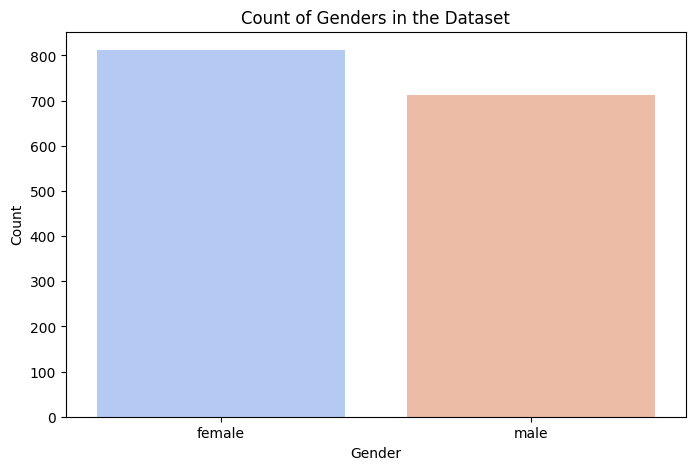

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, palette='coolwarm')
plt.title('Count of Genders in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


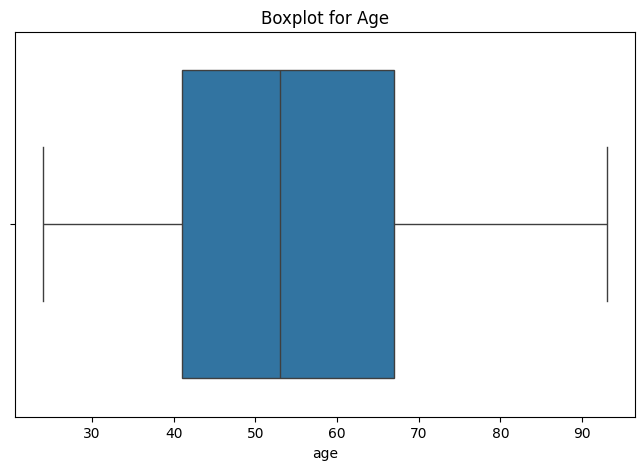

In [ ]:
# Boxplot to visualize outliers in age
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'])
plt.title('Boxplot for Age')
plt.show()

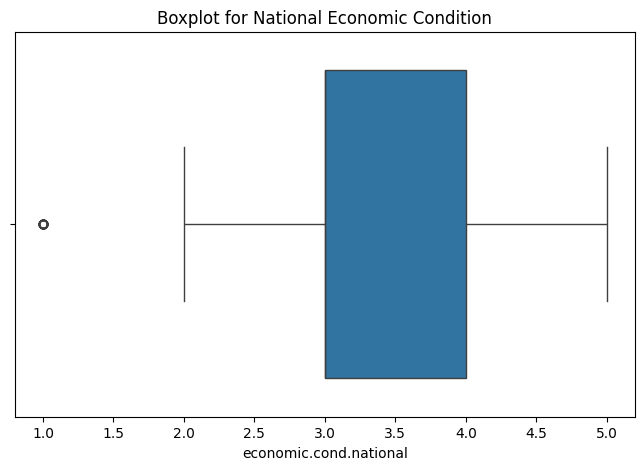

In [ ]:
# Boxplot to visualize outliers in national economic condition
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['economic.cond.national'])
plt.title('Boxplot for National Economic Condition')
plt.show()

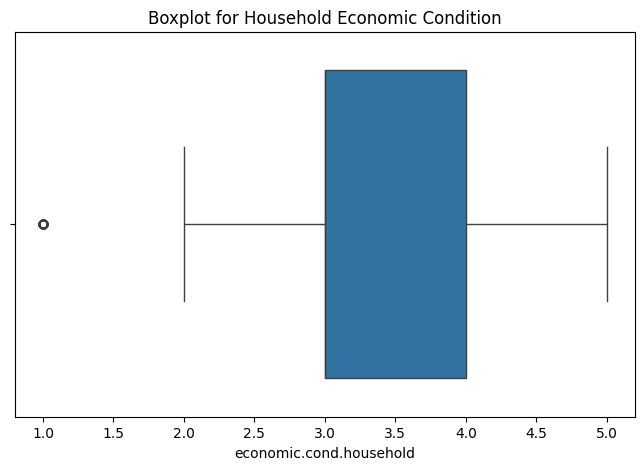

In [ ]:
# Boxplot to visualize outliers in household economic condition
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['economic.cond.household'])
plt.title('Boxplot for Household Economic Condition')
plt.show()

In [ ]:
from scipy import stats

# Z-score calculation for continuous variables
z_scores = np.abs(stats.zscore(df[['age', 'economic.cond.national', 'economic.cond.household']]))
print(z_scores)

# Define threshold for outliers (commonly 3)
threshold = 3

# Identify outliers based on Z-score
outliers_zscore = np.where(z_scores > threshold)
print(f"Outliers detected at positions (row, column): {outliers_zscore}")


           age  economic.cond.national  economic.cond.household
0     0.711973                0.279218                 0.150948
1     1.157661                0.856268                 0.924730
2     1.221331                0.856268                 0.924730
3     1.921698                0.856268                 1.226625
4     0.839313                1.414704                 1.226625
...        ...                     ...                      ...
1520  0.816100                1.991754                 0.150948
1521  1.198118                1.414704                 1.226625
1522  1.093992                0.279218                 0.150948
1523  0.434081                0.279218                 0.150948
1524  1.261787                1.414704                 0.150948

[1525 rows x 3 columns]
Outliers detected at positions (row, column): (array([], dtype=int64), array([], dtype=int64))


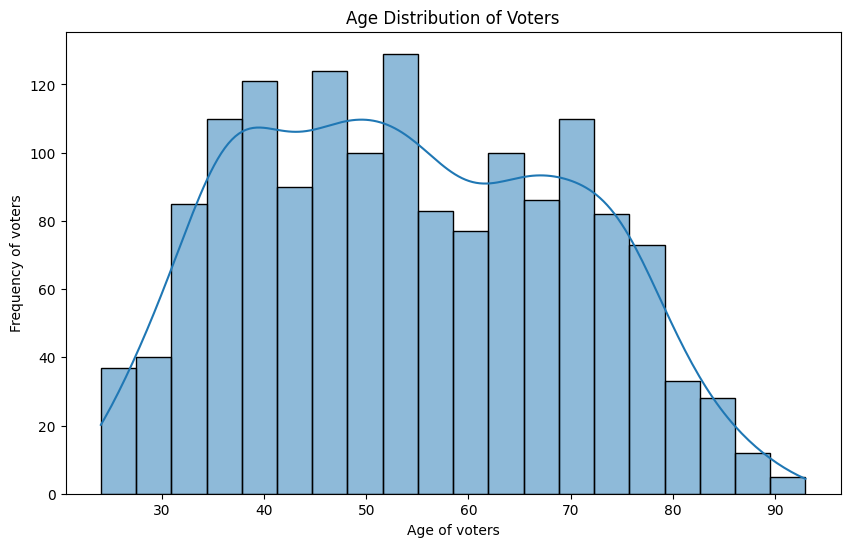

In [ ]:
#Univariate Analysis - In this we will consider only one variable for analysis

#1 Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df["age"],kde=True,bins=20)
plt.title("Age Distribution of Voters")
plt.xlabel("Age of voters")
plt.ylabel("Frequency of voters")
plt.show()



In [ ]:
# IQR method for outlier detection in 'age' column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_IQR_age = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print("Outliers in 'age' using IQR method:")
print(outliers_IQR_age)

# Same can be done for other columns like 'economic.cond.national' and 'economic.cond.household'
Q1_nat = df['economic.cond.national'].quantile(0.25)
Q3_nat = df['economic.cond.national'].quantile(0.75)
IQR_nat = Q3_nat - Q1_nat

lower_bound_nat = Q1_nat - 1.5 * IQR_nat
upper_bound_nat = Q3_nat + 1.5 * IQR_nat

outliers_IQR_nat = df[(df['economic.cond.national'] < lower_bound_nat) | (df['economic.cond.national'] > upper_bound_nat)]
print("Outliers in 'economic.cond.national' using IQR method:")
print(outliers_IQR_nat)


Outliers in 'age' using IQR method:
Empty DataFrame
Columns: [vote, age, economic.cond.national, economic.cond.household, Blair, Hague, Kennedy, Europe, political.knowledge, gender]
Index: []
Outliers in 'economic.cond.national' using IQR method:
                  vote  age  economic.cond.national  economic.cond.household  \
39        Conservative   72                       1                        3   
42              Labour   66                       1                        1   
57              Labour   32                       1                        2   
91        Conservative   49                       1                        1   
105             Labour   60                       1                        3   
109             Labour   31                       1                        1   
159             Labour   67                       1                        3   
165       Conservative   53                       1                        3   
215       Conservative   34      

In [ ]:
# Removing outliers using IQR for 'age'
df_no_outliers_age = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Removing outliers using IQR for 'economic.cond.national'
df_no_outliers_nat = df_no_outliers_age[(df_no_outliers_age['economic.cond.national'] >= lower_bound_nat) &
                                        (df_no_outliers_age['economic.cond.national'] <= upper_bound_nat)]

print(f"Dataset shape after removing outliers: {df_no_outliers_nat.shape}")


Dataset shape after removing outliers: (1488, 10)


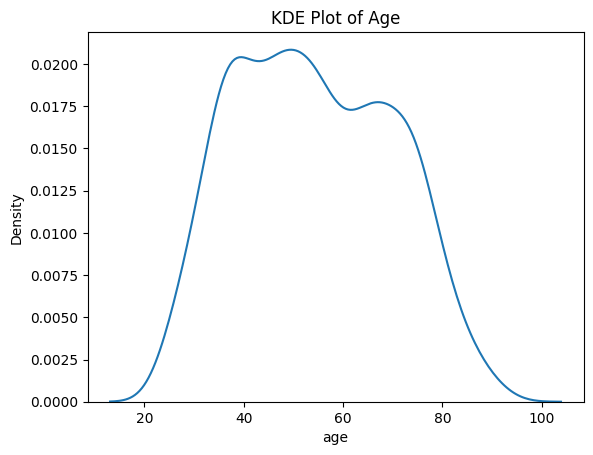

In [ ]:
# KDE Plot
sns.kdeplot(df["age"])
plt.title('KDE Plot of Age')
plt.show()

Text(0, 0.5, 'Frequency of voters')

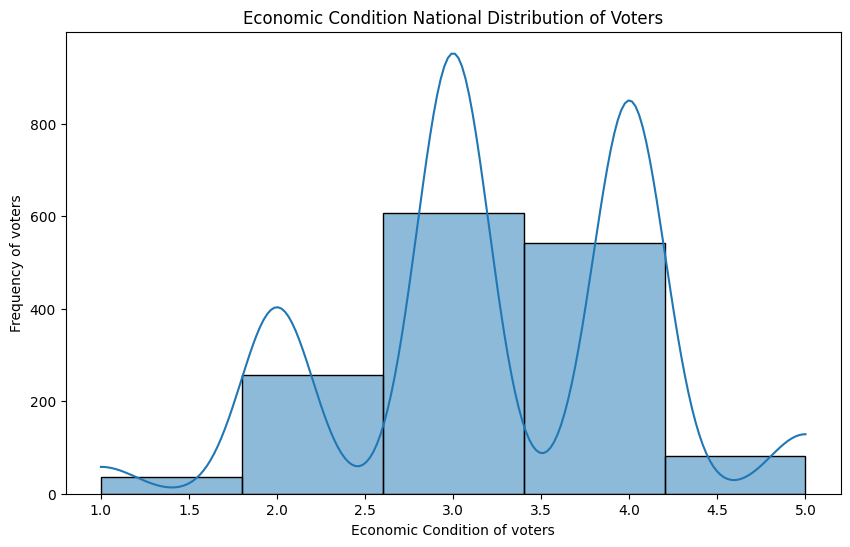

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["economic.cond.national"],kde=True,bins=5)
plt.title("Economic Condition National Distribution of Voters")
plt.xlabel("Economic Condition of voters")
plt.ylabel("Frequency of voters")

Text(0, 0.5, 'Frequency of voters')

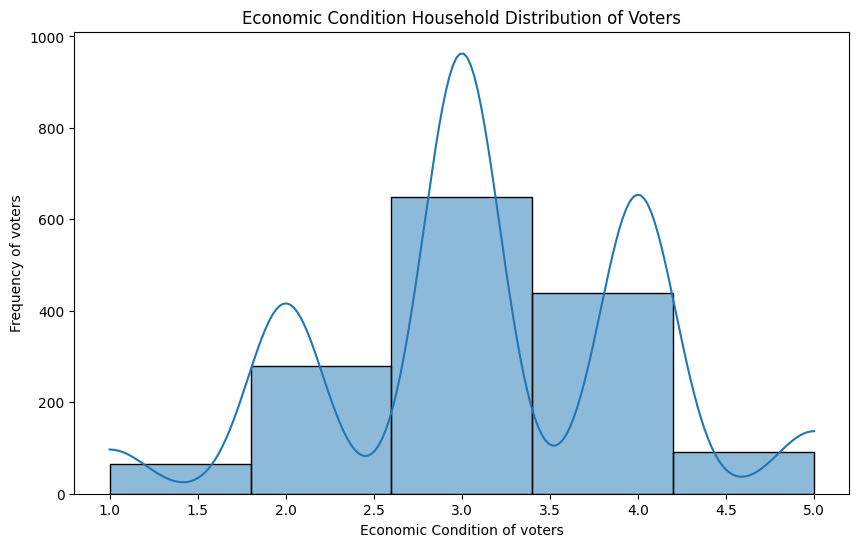

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["economic.cond.household"],kde=True,bins=5)
plt.title("Economic Condition Household Distribution of Voters")
plt.xlabel("Economic Condition of voters")
plt.ylabel("Frequency of voters")

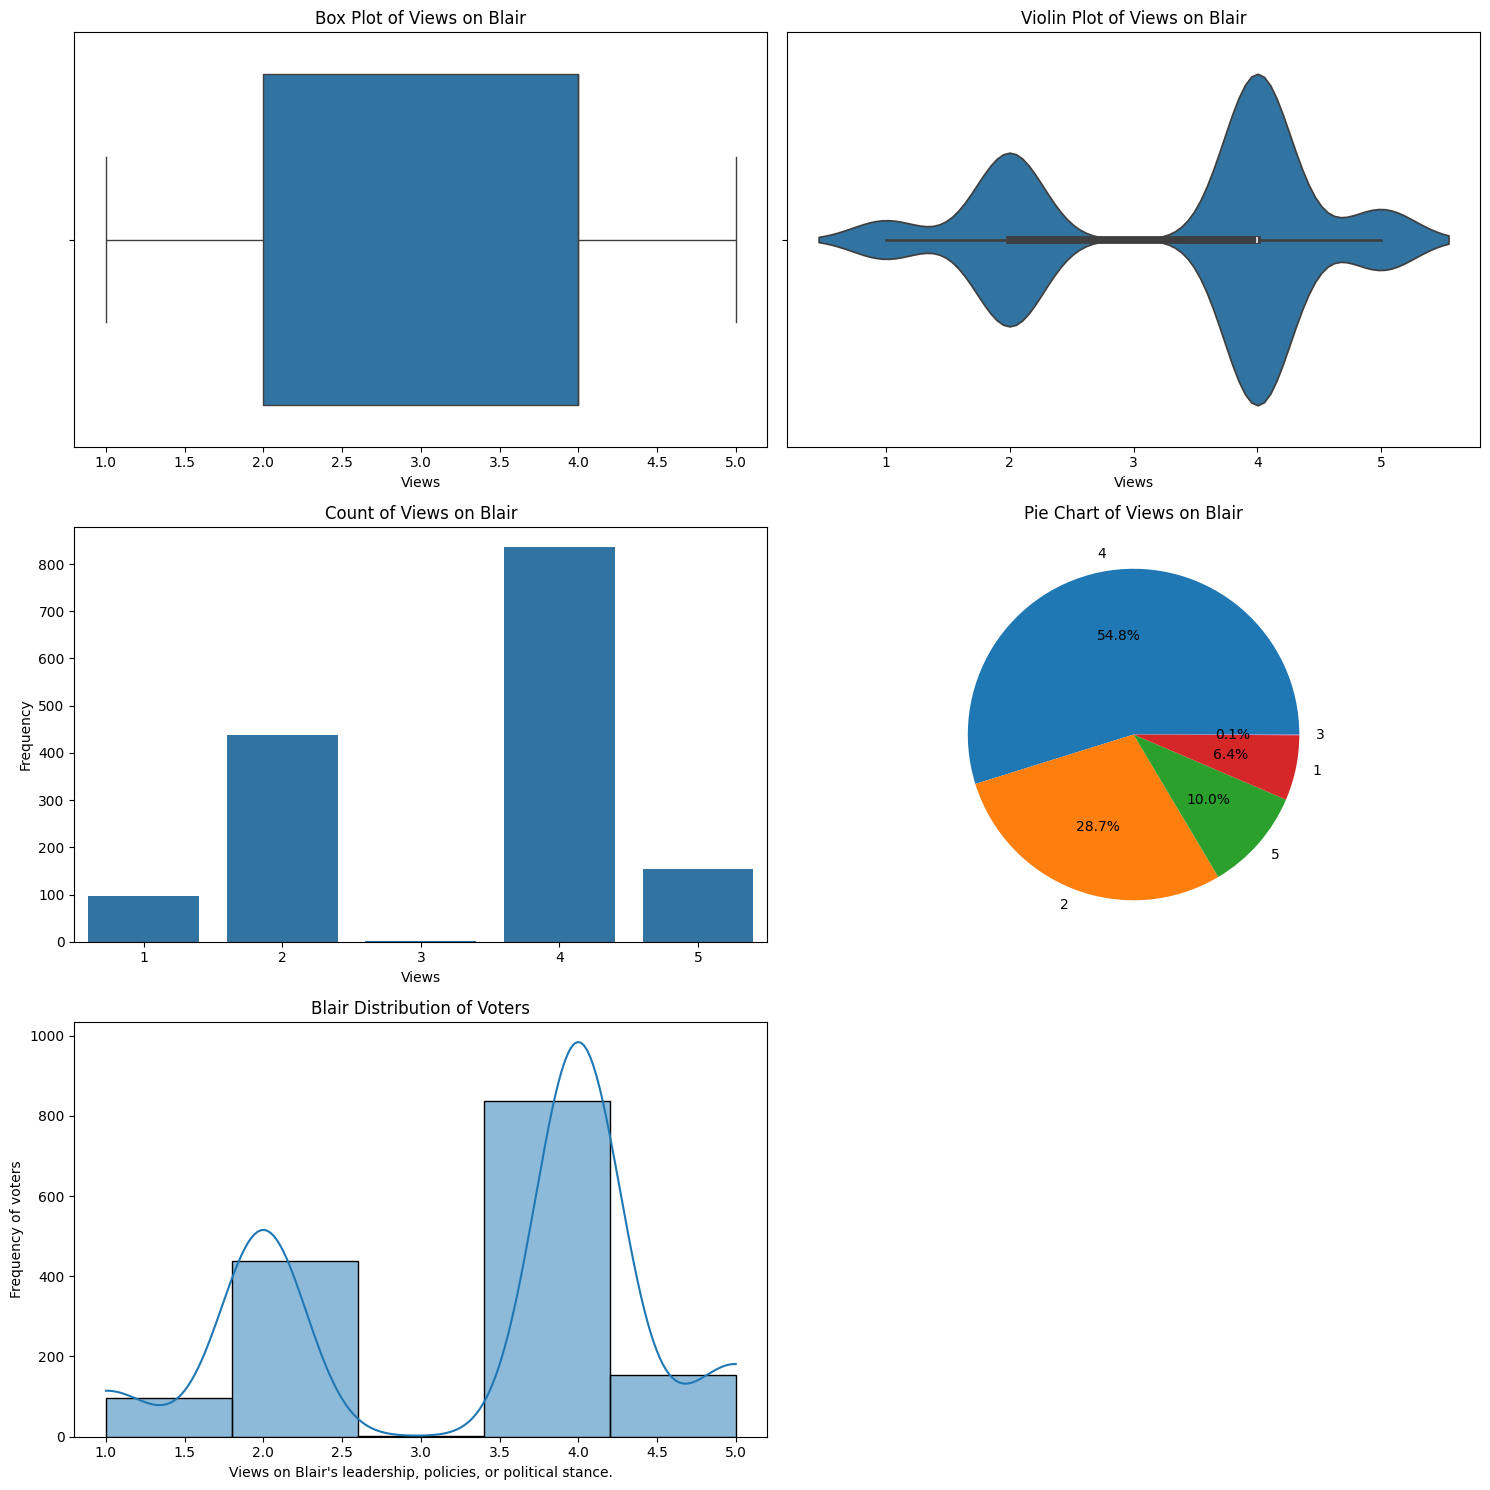

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot for Blair
sns.boxplot(x=df['Blair'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Views on Blair")
axs[0, 0].set_xlabel("Views")

# Violin Plot for Blair
sns.violinplot(x=df['Blair'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Views on Blair")
axs[0, 1].set_xlabel("Views")

# Count Plot for Blair
sns.countplot(x='Blair', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Views on Blair")
axs[1, 0].set_xlabel("Views")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart for Blair
df['Blair'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Views on Blair")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE for Blair
sns.histplot(df["Blair"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Blair Distribution of Voters")
axs[2, 0].set_xlabel("Views on Blair's leadership, policies, or political stance.")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide empty subplot (if any)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

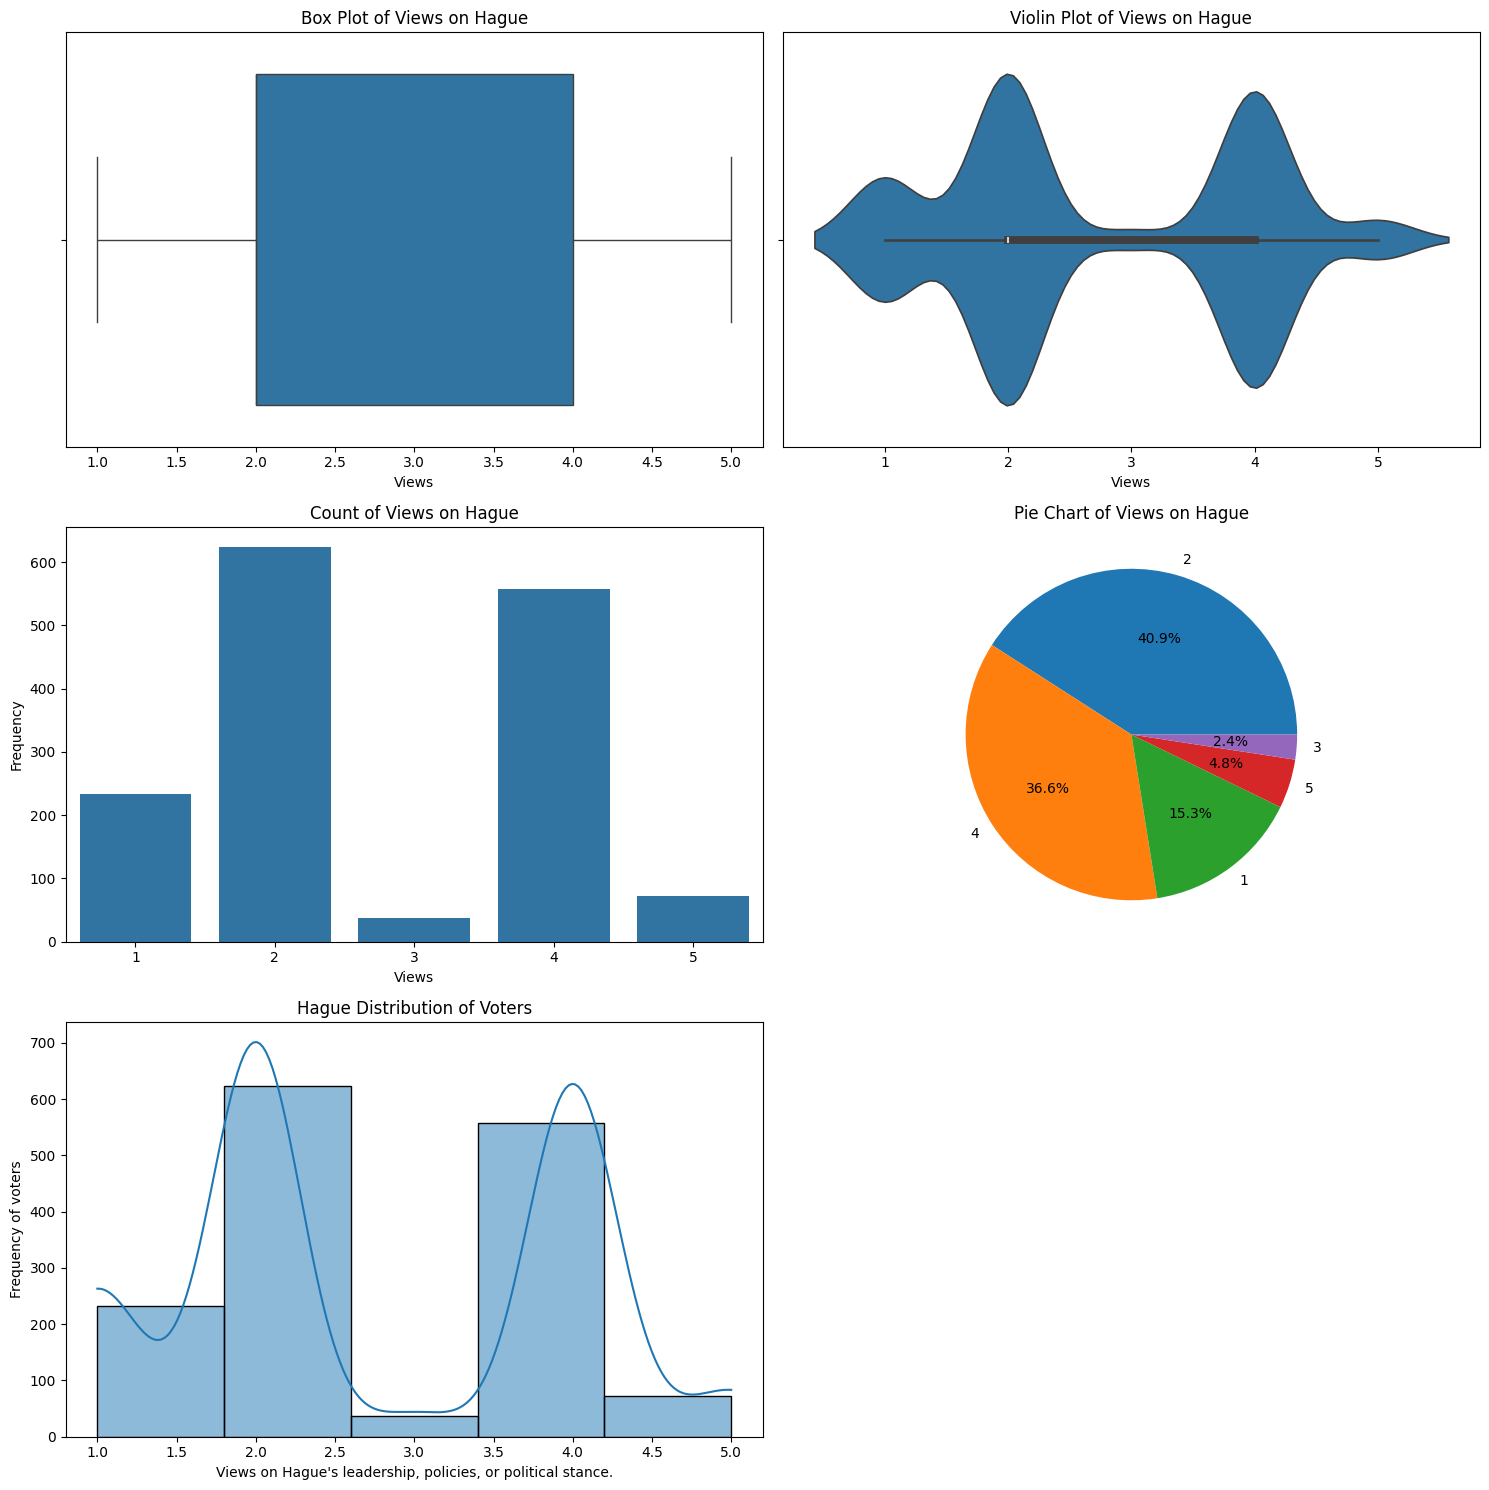

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot
sns.boxplot(x=df['Hague'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Views on Hague")
axs[0, 0].set_xlabel("Views")

# Violin Plot
sns.violinplot(x=df['Hague'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Views on Hague")
axs[0, 1].set_xlabel("Views")

# Count Plot
sns.countplot(x='Hague', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Views on Hague")
axs[1, 0].set_xlabel("Views")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart
df['Hague'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Views on Hague")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE
sns.histplot(df["Hague"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Hague Distribution of Voters")
axs[2, 0].set_xlabel("Views on Hague's leadership, policies, or political stance.")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide empty subplot (if any)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

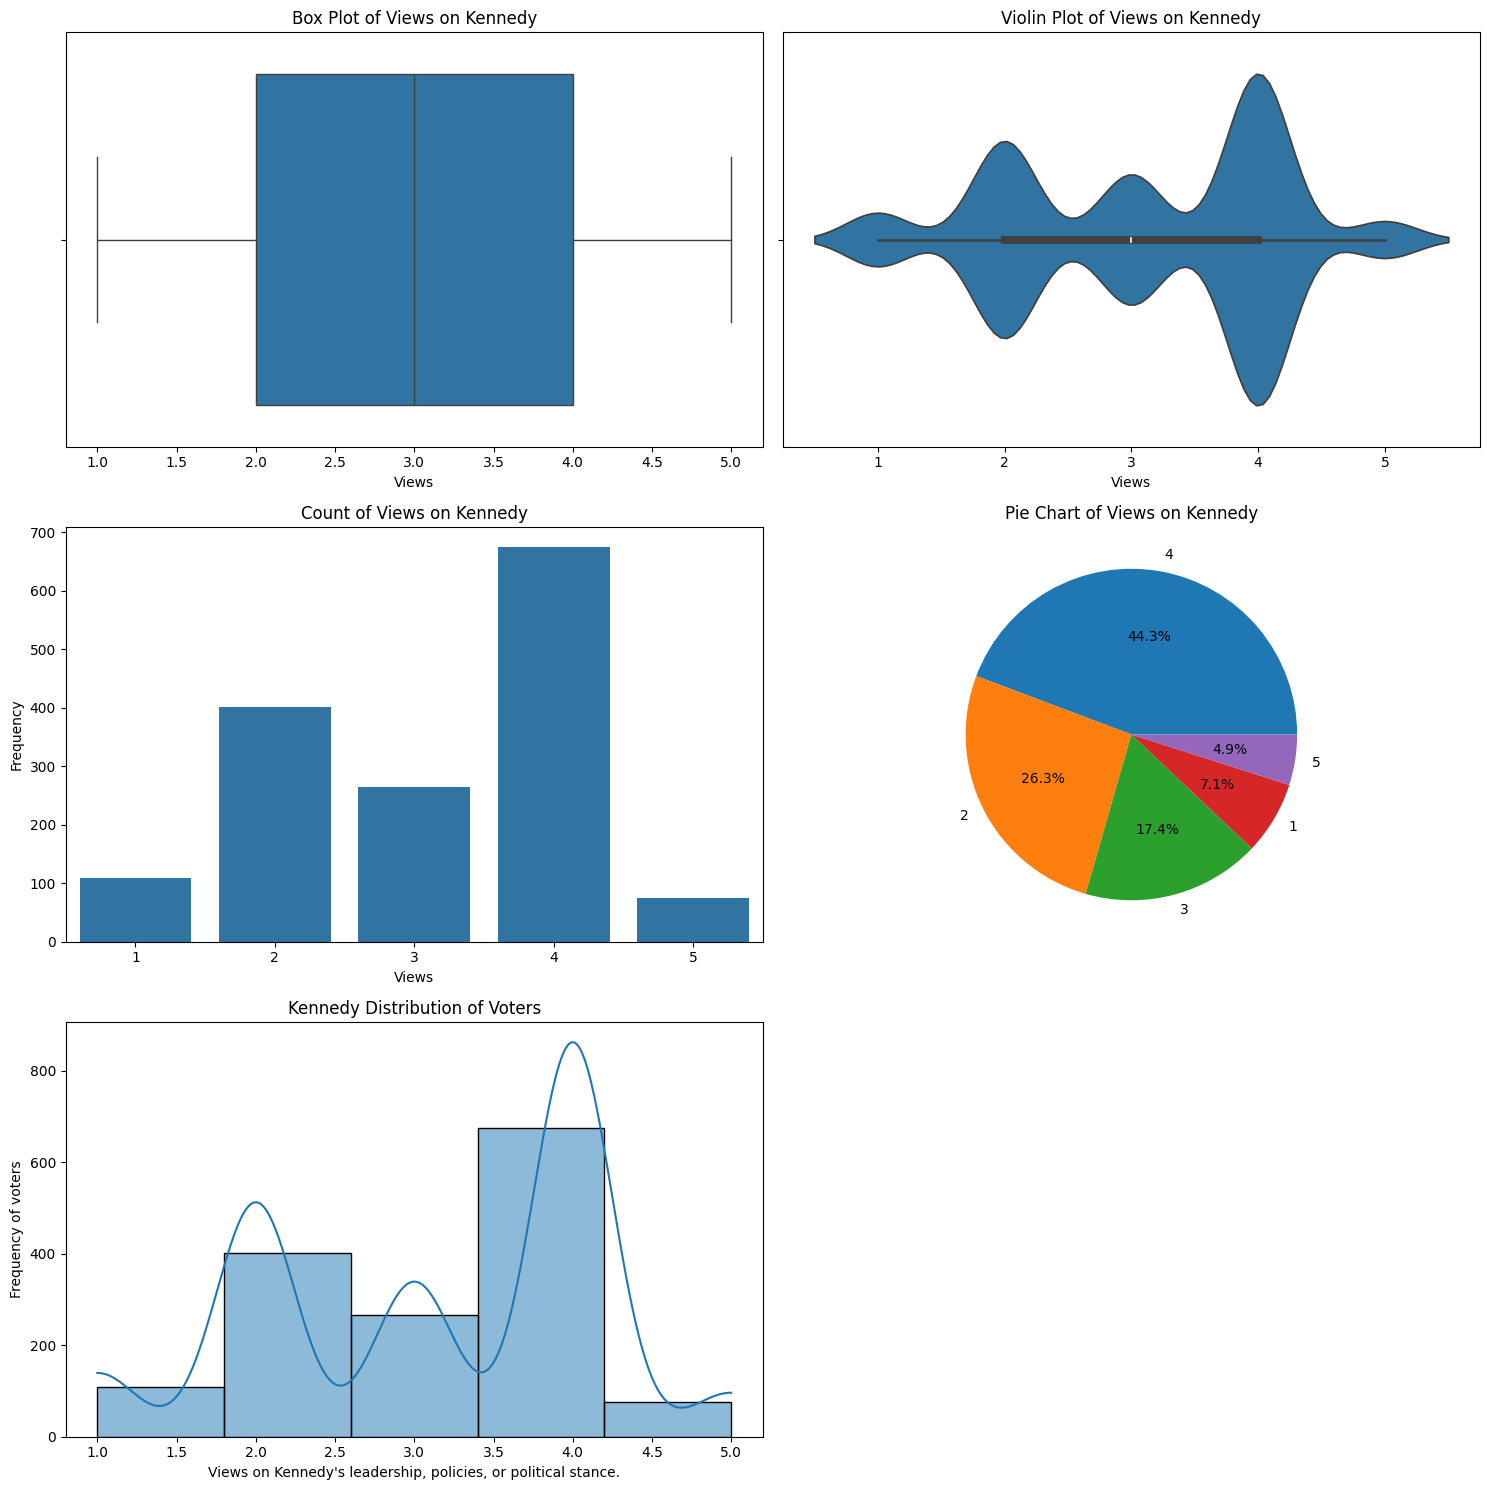

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot for Kennedy
sns.boxplot(x=df['Kennedy'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Views on Kennedy")
axs[0, 0].set_xlabel("Views")

# Violin Plot for Kennedy
sns.violinplot(x=df['Kennedy'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Views on Kennedy")
axs[0, 1].set_xlabel("Views")

# Count Plot for Kennedy
sns.countplot(x='Kennedy', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Views on Kennedy")
axs[1, 0].set_xlabel("Views")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart for Kennedy
df['Kennedy'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Views on Kennedy")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE for Kennedy
sns.histplot(df["Kennedy"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Kennedy Distribution of Voters")
axs[2, 0].set_xlabel("Views on Kennedy's leadership, policies, or political stance.")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide the empty subplot (last one)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

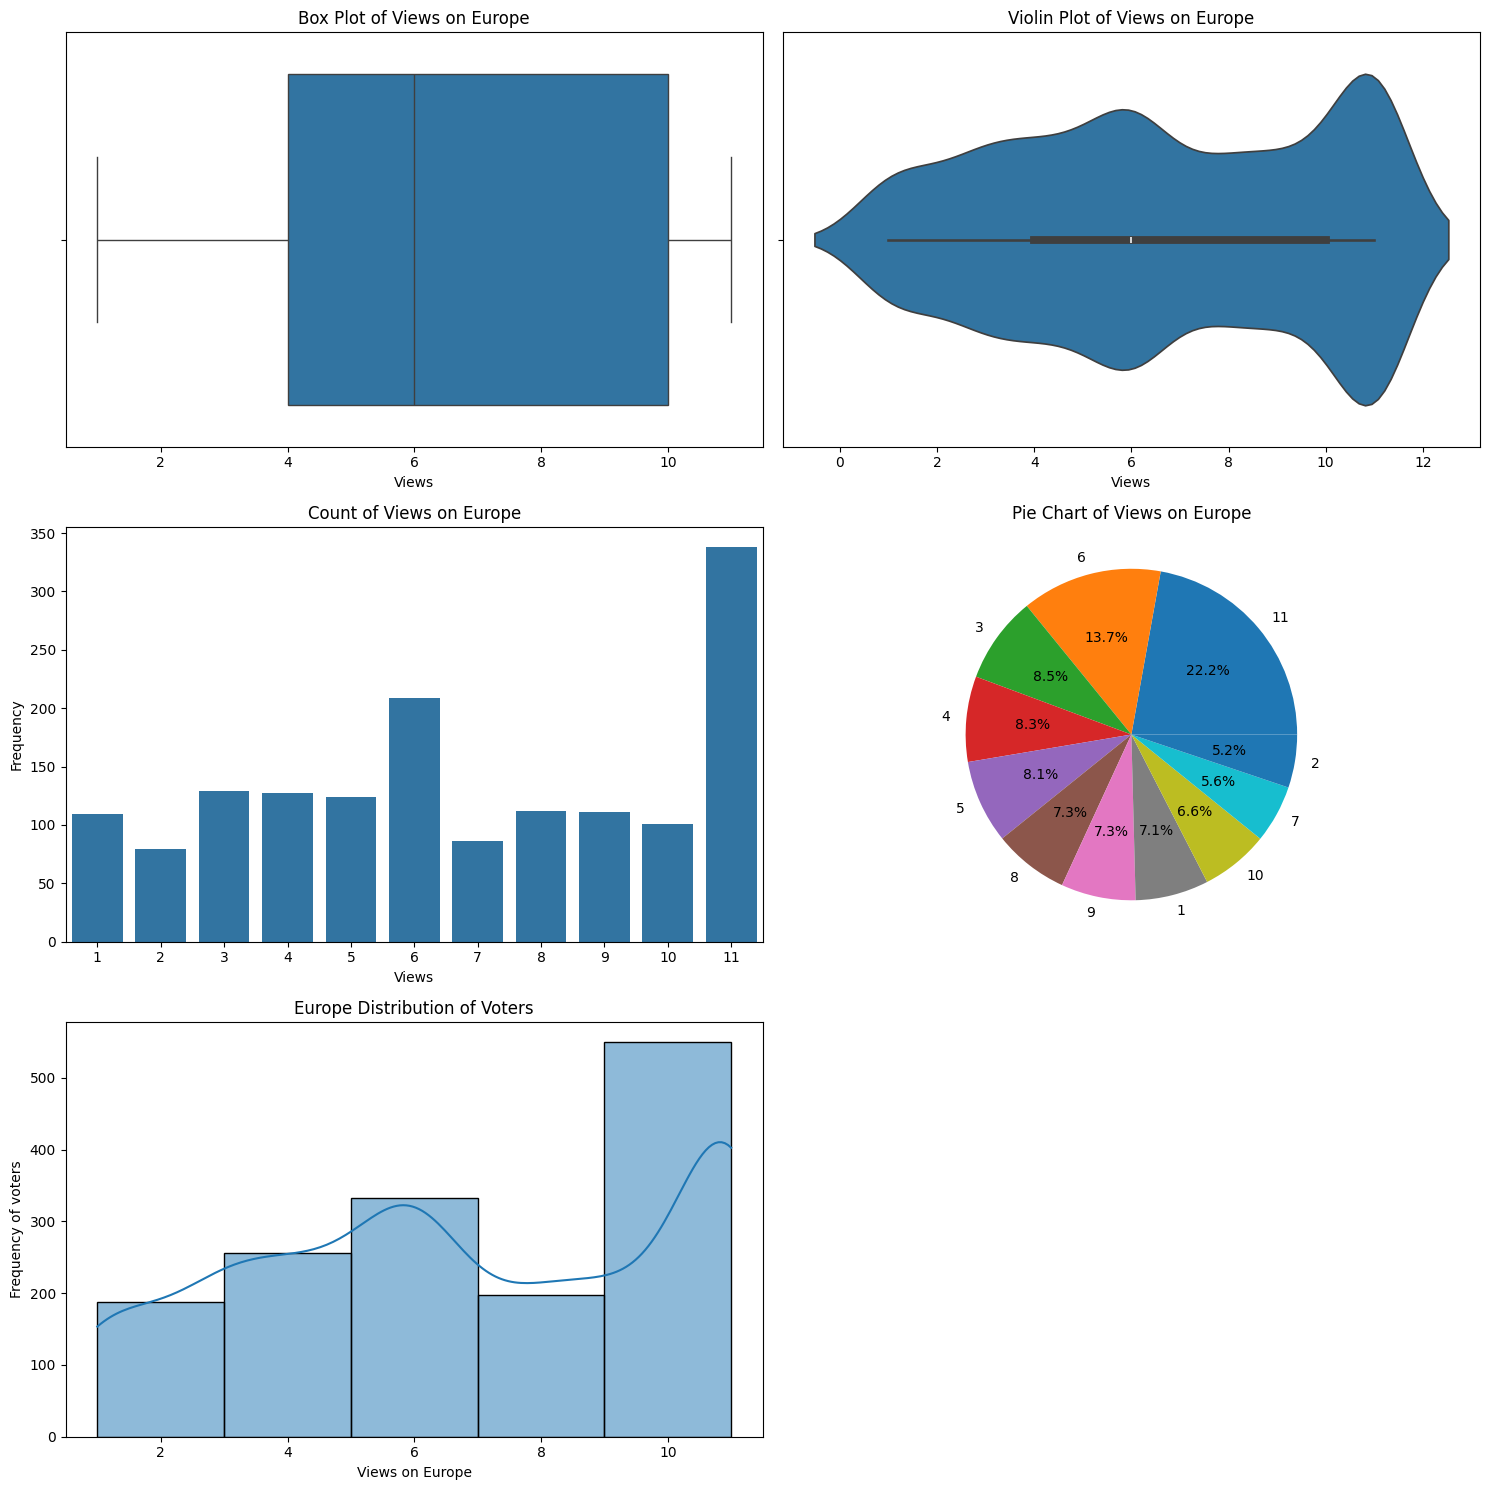

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot for Europe
sns.boxplot(x=df['Europe'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Views on Europe")
axs[0, 0].set_xlabel("Views")

# Violin Plot for Europe
sns.violinplot(x=df['Europe'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Views on Europe")
axs[0, 1].set_xlabel("Views")

# Count Plot for Europe
sns.countplot(x='Europe', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Views on Europe")
axs[1, 0].set_xlabel("Views")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart for Europe
df['Europe'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Views on Europe")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE for Europe
sns.histplot(df["Europe"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Europe Distribution of Voters")
axs[2, 0].set_xlabel("Views on Europe")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide the empty subplot (if any)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

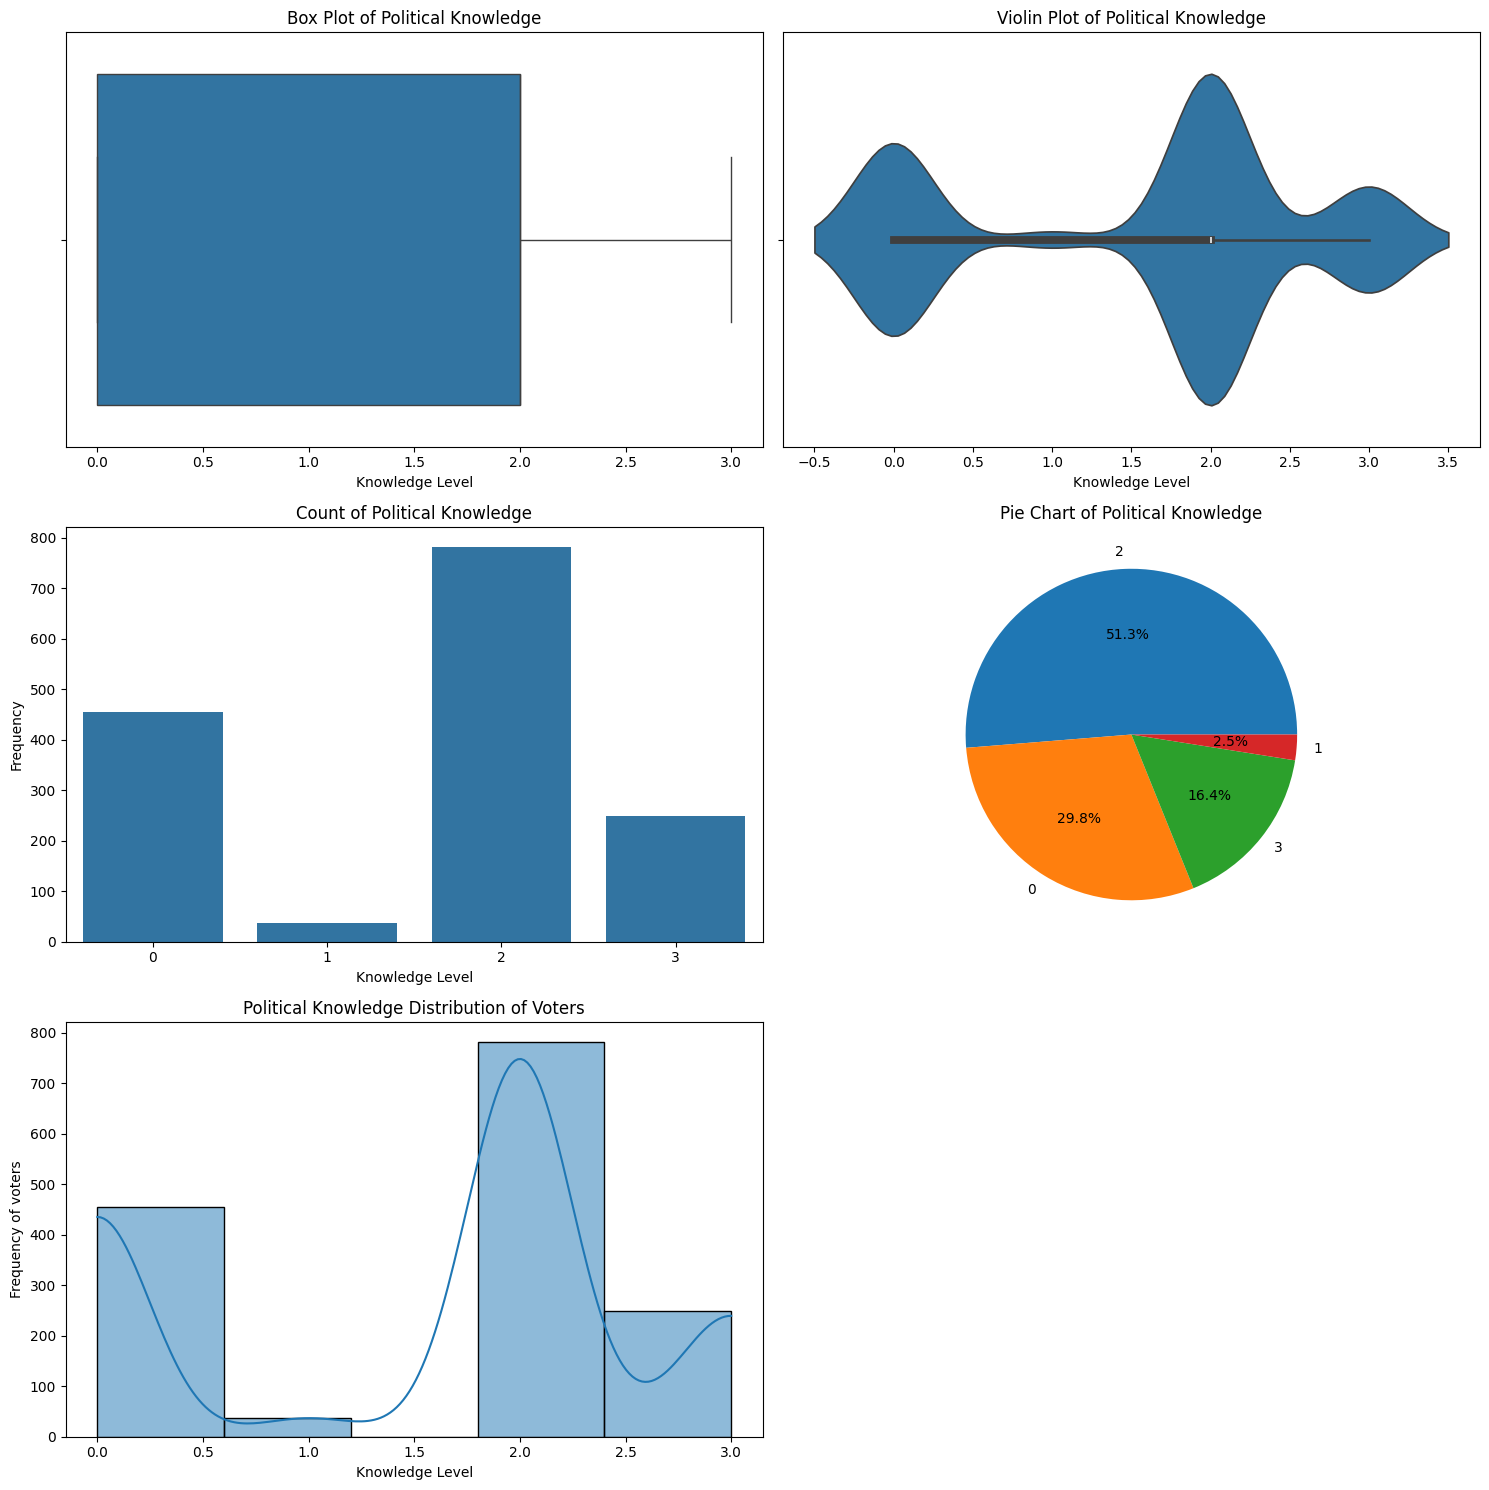

In [ ]:
# Create a figure with subplots for Political Knowledge
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Box Plot for Political Knowledge
sns.boxplot(x=df['political.knowledge'], ax=axs[0, 0])
axs[0, 0].set_title("Box Plot of Political Knowledge")
axs[0, 0].set_xlabel("Knowledge Level")

# Violin Plot for Political Knowledge
sns.violinplot(x=df['political.knowledge'], ax=axs[0, 1])
axs[0, 1].set_title("Violin Plot of Political Knowledge")
axs[0, 1].set_xlabel("Knowledge Level")

# Count Plot for Political Knowledge
sns.countplot(x='political.knowledge', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Count of Political Knowledge")
axs[1, 0].set_xlabel("Knowledge Level")
axs[1, 0].set_ylabel("Frequency")

# Pie Chart for Political Knowledge
df['political.knowledge'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Pie Chart of Political Knowledge")
axs[1, 1].set_ylabel("")  # Remove y-label for clarity

# Histogram with KDE for Political Knowledge
sns.histplot(df["political.knowledge"], kde=True, bins=5, ax=axs[2, 0])
axs[2, 0].set_title("Political Knowledge Distribution of Voters")
axs[2, 0].set_xlabel("Knowledge Level")
axs[2, 0].set_ylabel("Frequency of voters")

# Hide the empty subplot (if any)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


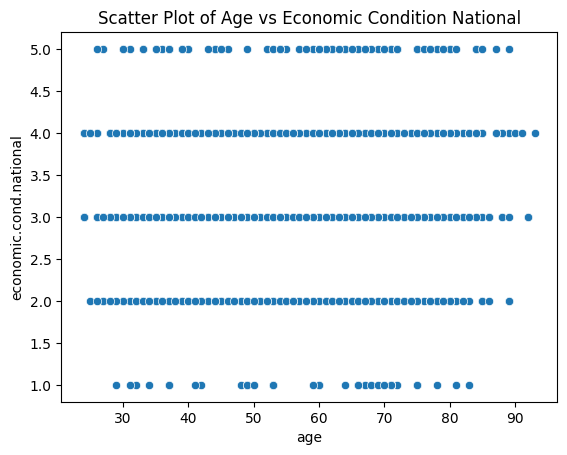

In [ ]:
# Bivariate Analysis
sns.scatterplot(x='age', y='economic.cond.national', data=df)
plt.title('Scatter Plot of Age vs Economic Condition National')
plt.show()


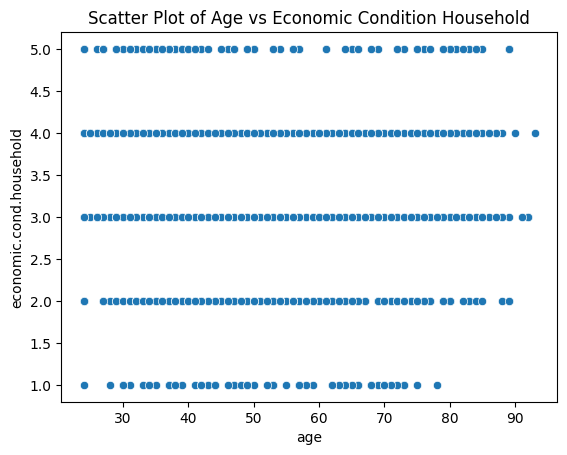

In [ ]:
sns.scatterplot(x='age', y='economic.cond.household', data=df)
plt.title('Scatter Plot of Age vs Economic Condition Household')
plt.show()

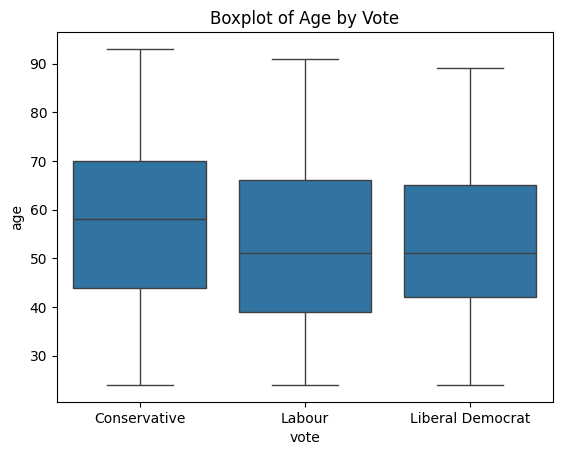

In [ ]:
sns.boxplot(x='vote', y='age', data=df) #boxplot
plt.title('Boxplot of Age by Vote')
plt.show()


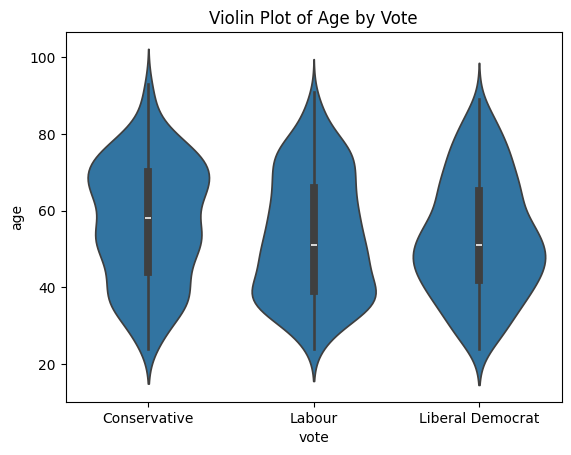

In [ ]:
sns.violinplot(x='vote', y='age', data=df) #violinplot
plt.title('Violin Plot of Age by Vote')
plt.show()


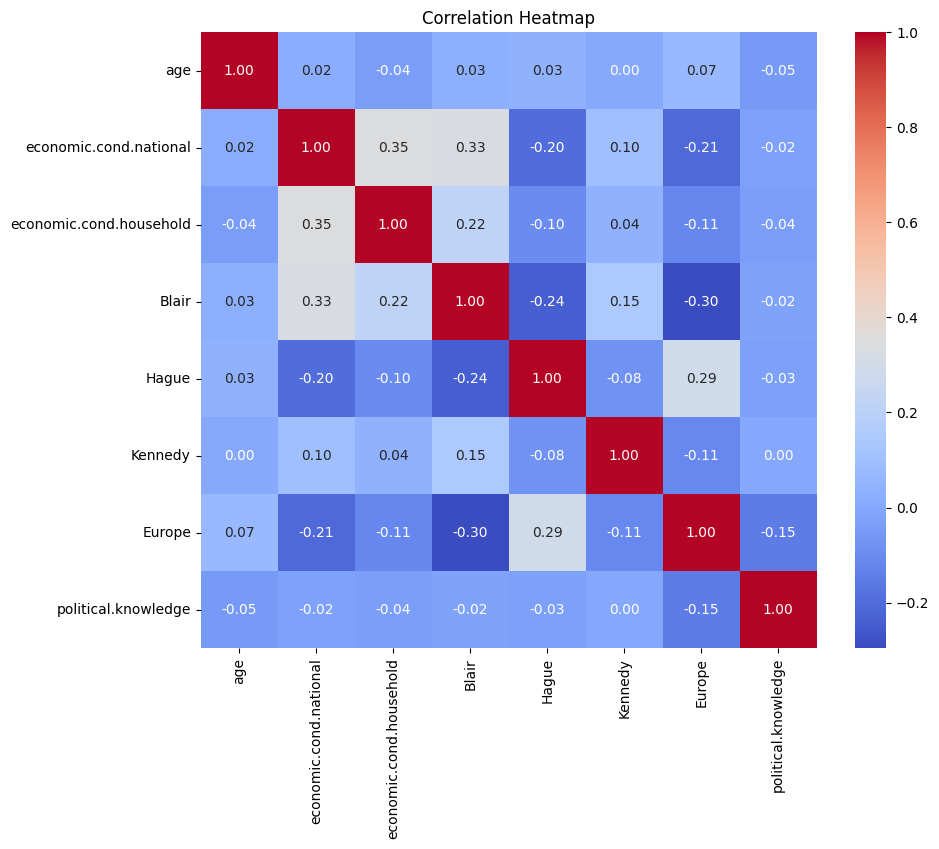

In [ ]:
plt.figure(figsize=(10, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


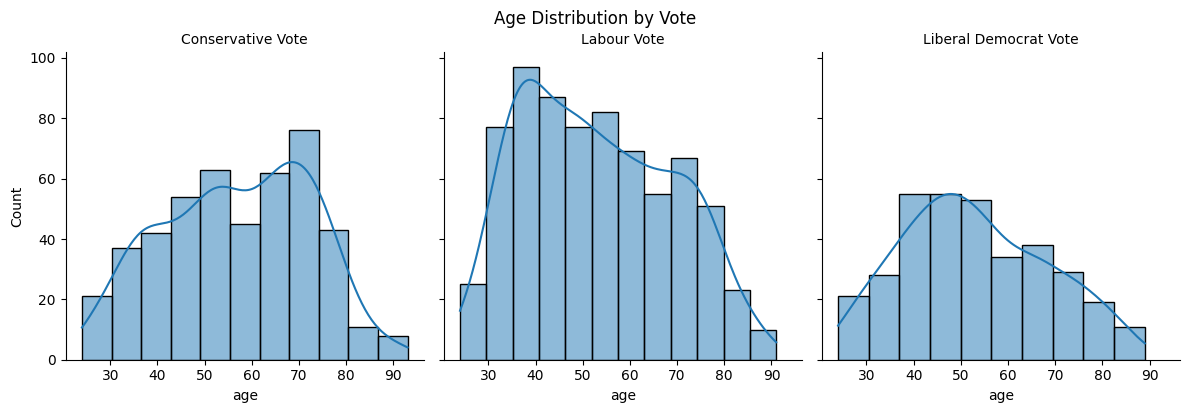

In [ ]:
g = sns.FacetGrid(df, col='vote', col_wrap=3, height=4)
g.map(sns.histplot, 'age', kde=True)
g.set_titles(col_template='{col_name} Vote')
plt.suptitle('Age Distribution by Vote', y=1.02)
plt.show()


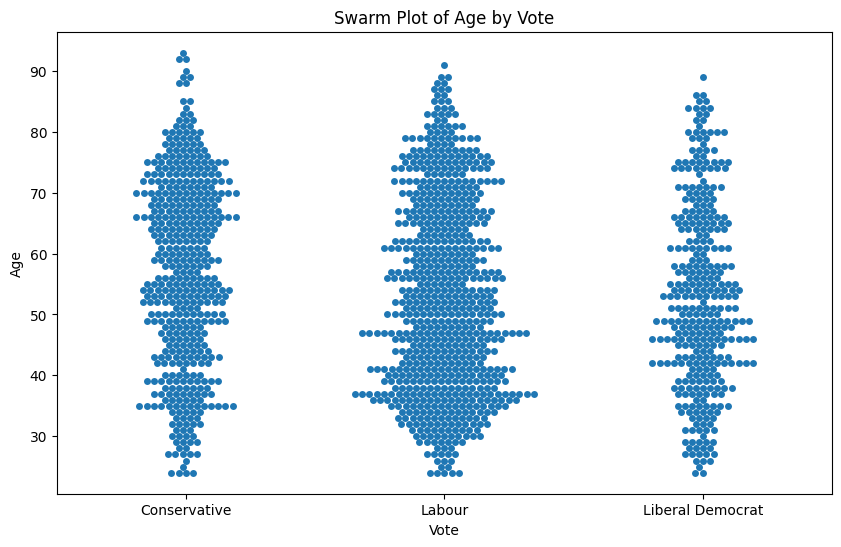

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='vote', y='age', data=df)
plt.title('Swarm Plot of Age by Vote')
plt.ylabel('Age')
plt.xlabel('Vote')
plt.show()


<ipython-input-39-4dbd6f3c89ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vote', data=df, palette='Set2')


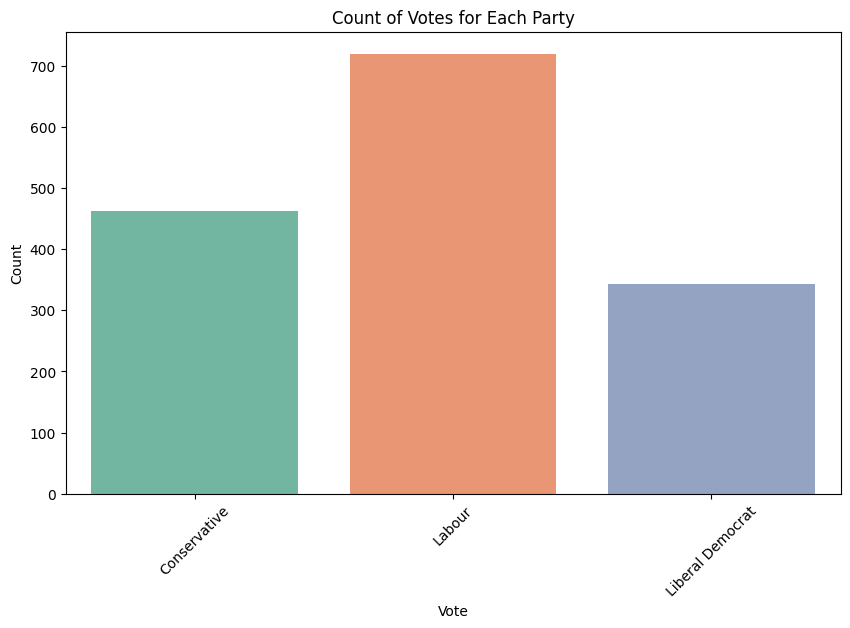

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='vote', data=df, palette='Set2')
plt.title('Count of Votes for Each Party')
plt.xlabel('Vote')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


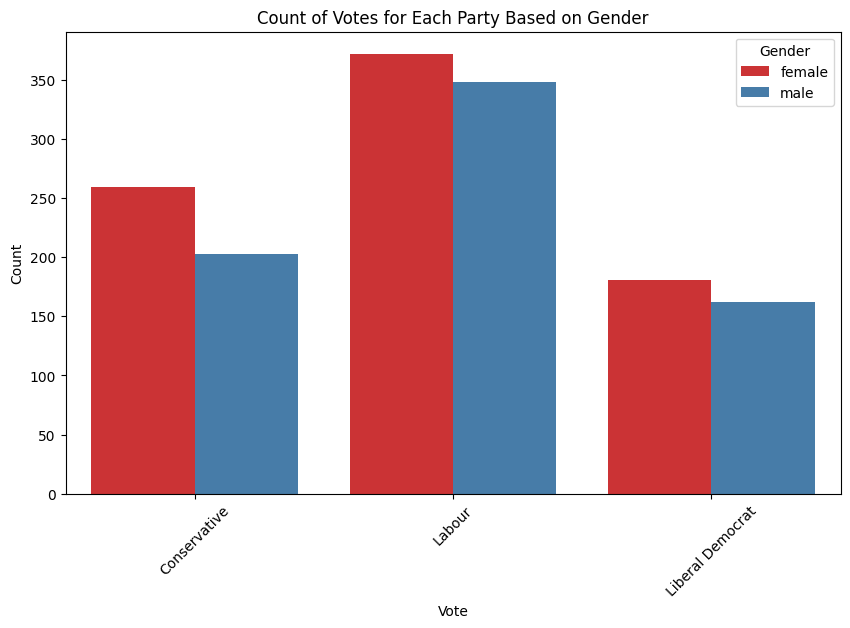

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='vote', hue='gender', data=df, palette='Set1')
plt.title('Count of Votes for Each Party Based on Gender')
plt.xlabel('Vote')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.legend(title='Gender')
plt.show()


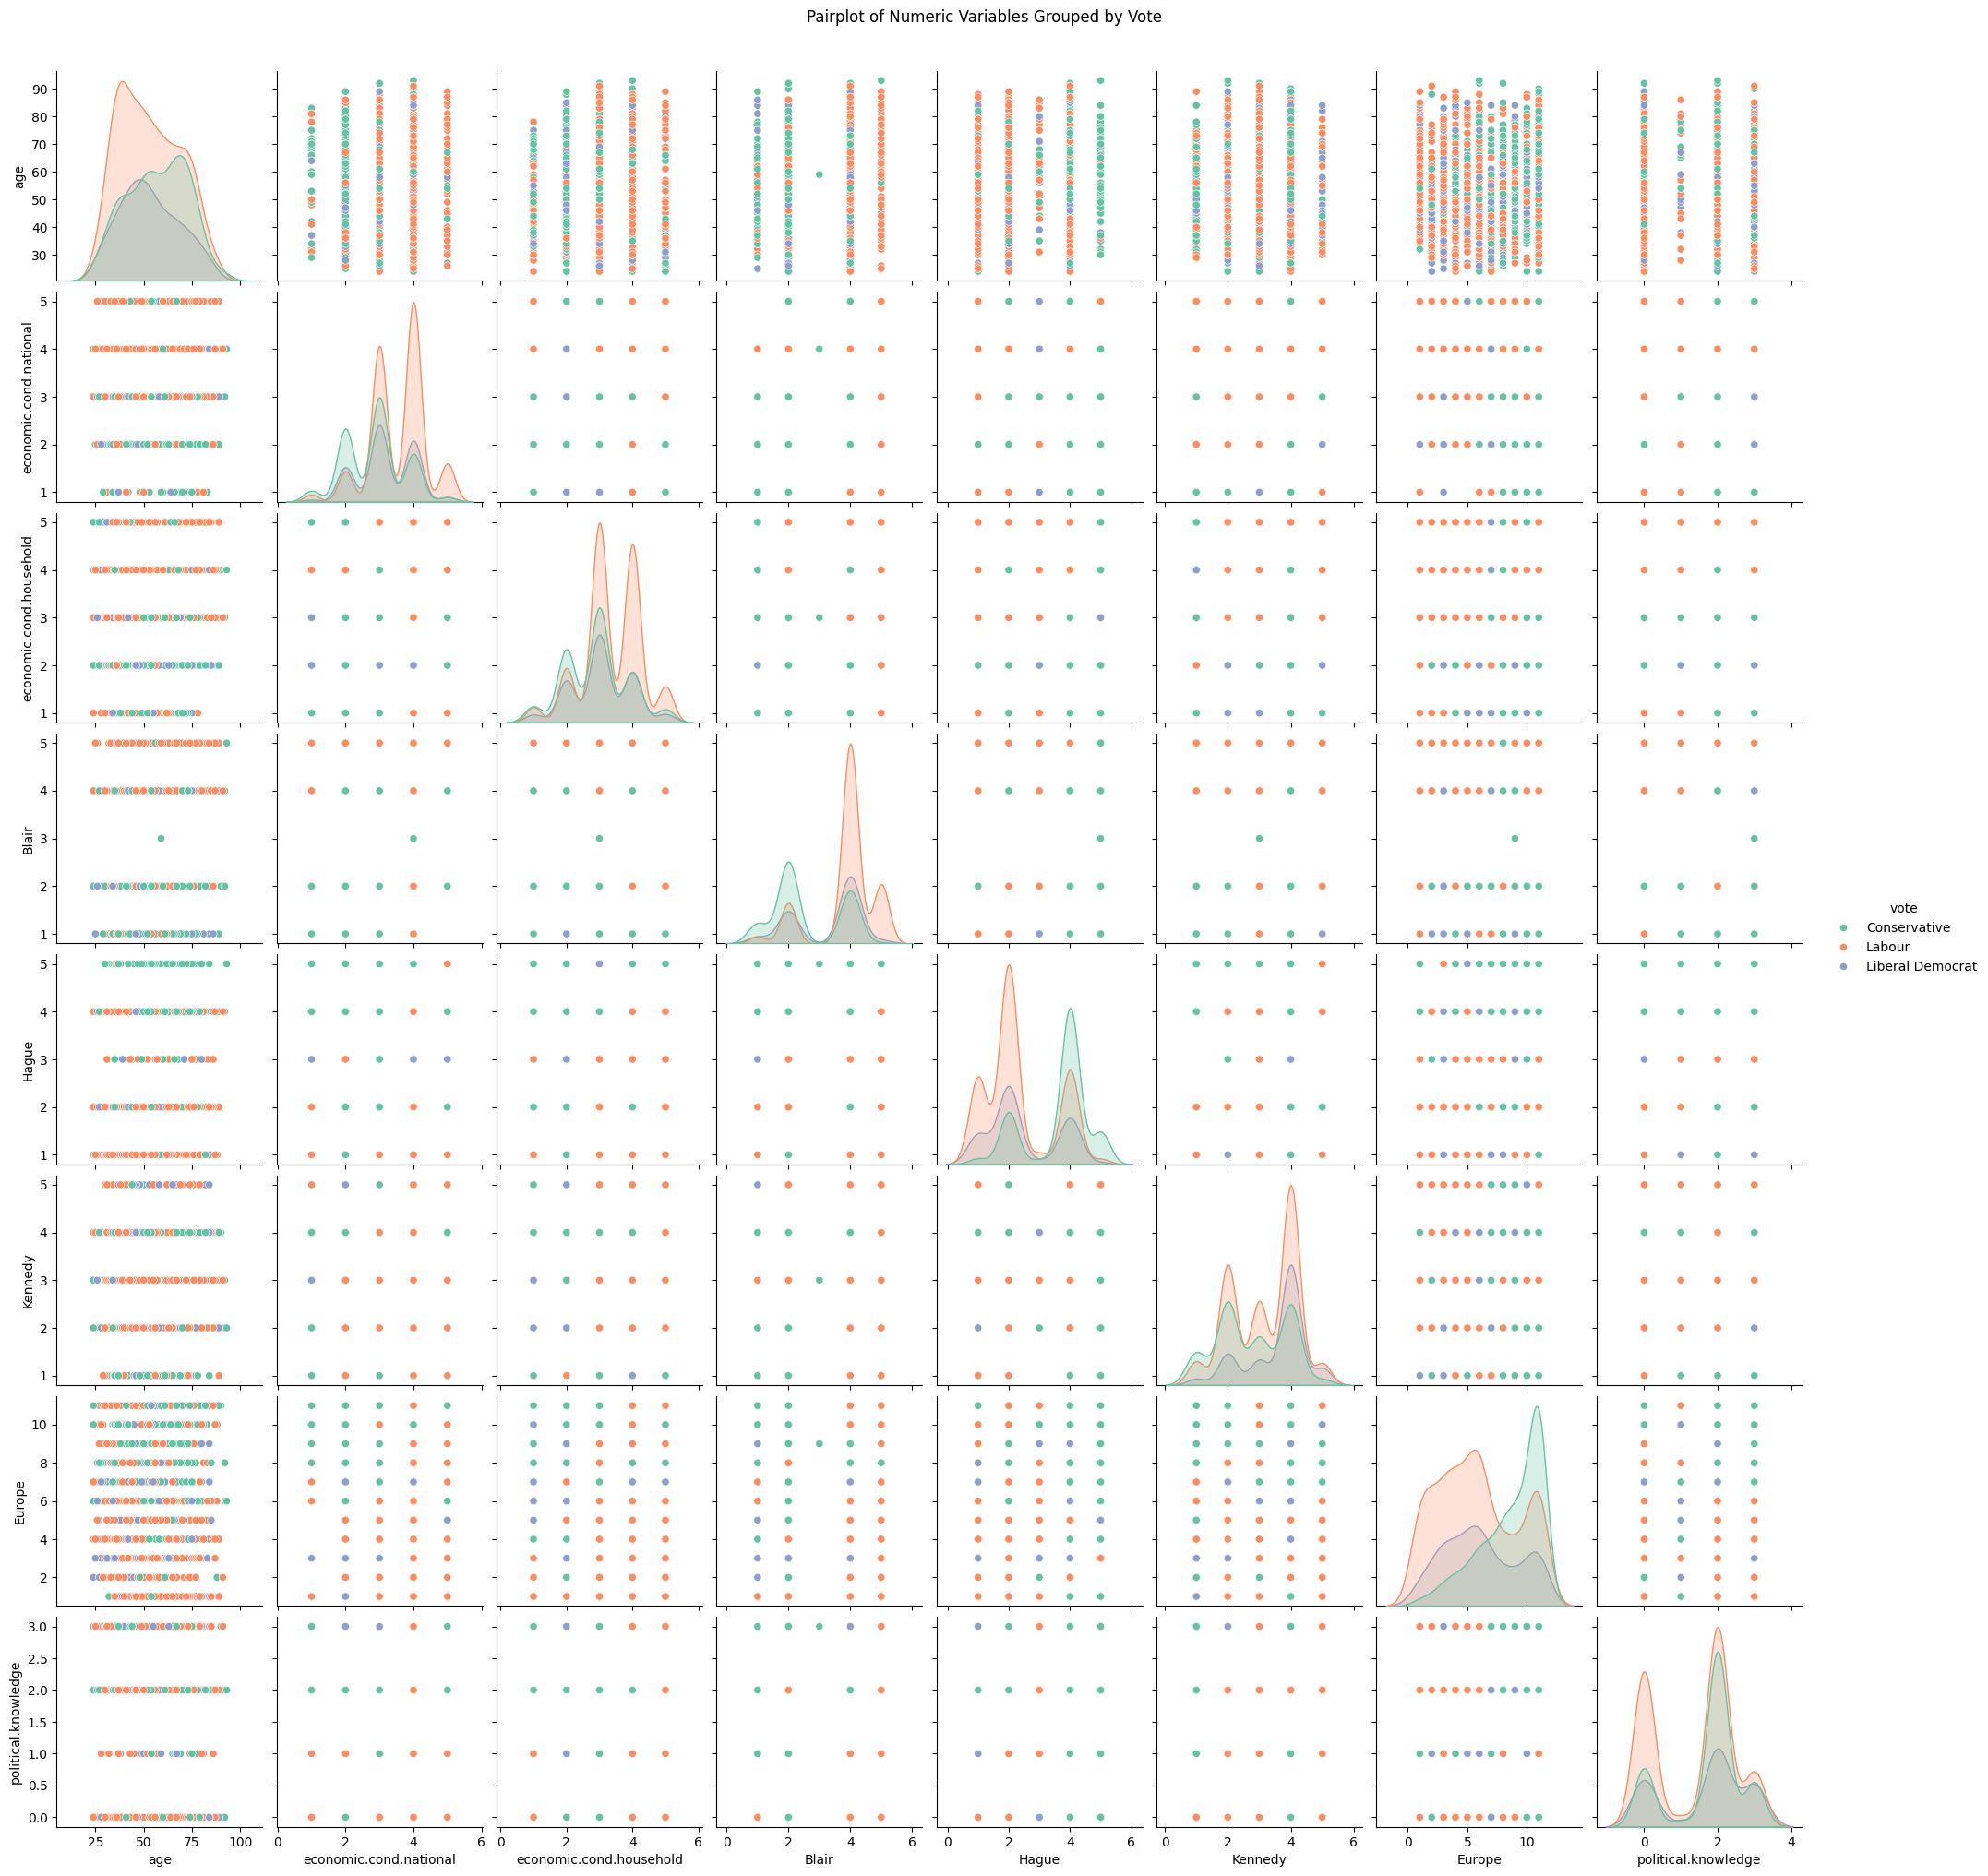

In [ ]:
# Pairplot of multiple variables, colored by 'vote'
sns.pairplot(df, hue='vote', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Numeric Variables Grouped by Vote', y=1.02)
plt.show()


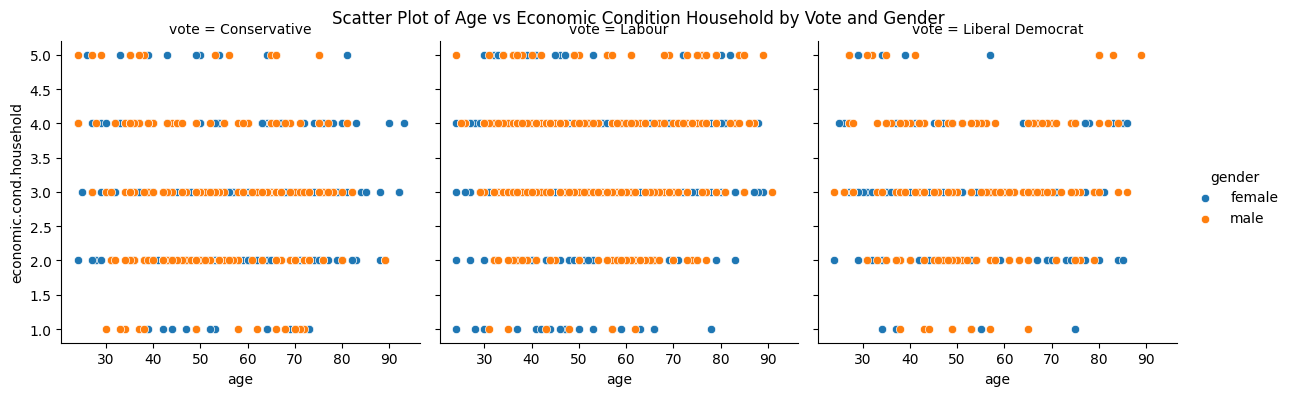

In [ ]:
# FacetGrid for multivariate analysis (scatterplot of age vs economic conditions by vote)
g = sns.FacetGrid(df, col="vote", hue="gender", height=4)
g.map(sns.scatterplot, "age", "economic.cond.household")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot of Age vs Economic Condition Household by Vote and Gender')
plt.show()


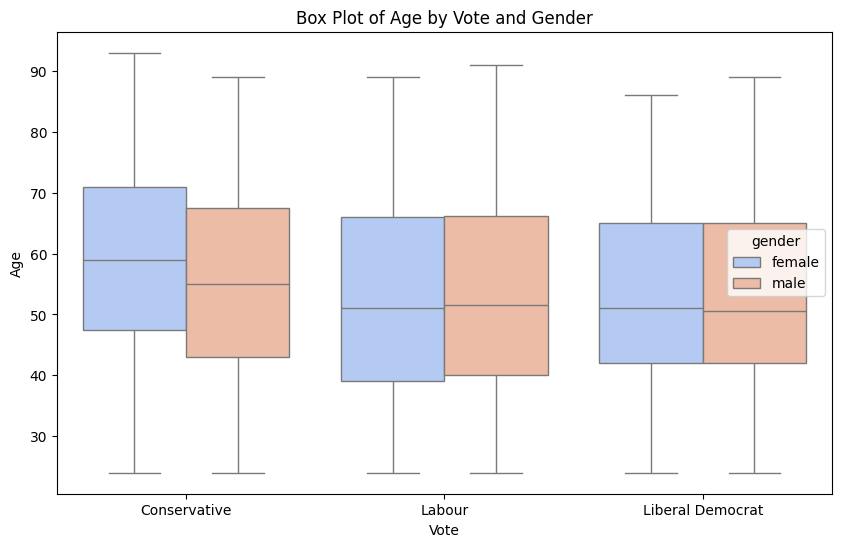

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vote', y='age', hue='gender', data=df, palette='coolwarm')
plt.title('Box Plot of Age by Vote and Gender')
plt.xlabel('Vote')
plt.ylabel('Age')
plt.show()


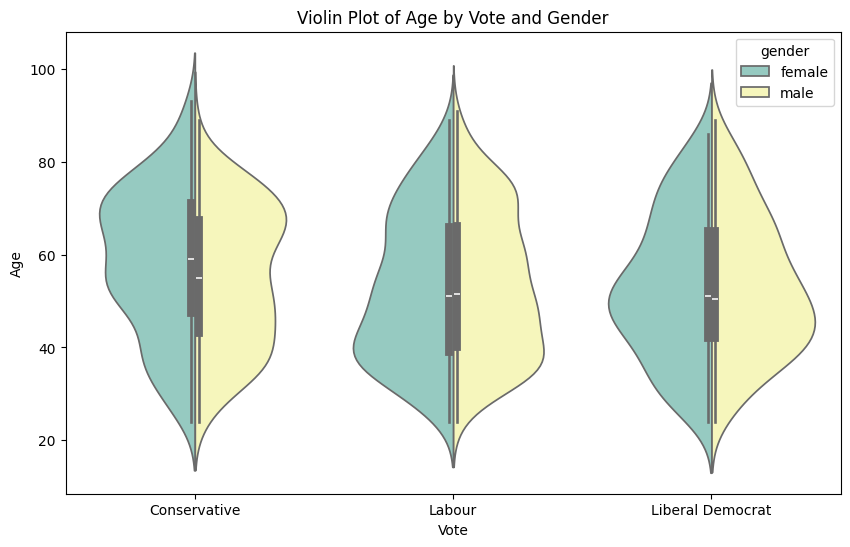

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='vote', y='age', hue='gender', data=df, split=True, palette='Set3')
plt.title('Violin Plot of Age by Vote and Gender')
plt.xlabel('Vote')
plt.ylabel('Age')
plt.show()


In [ ]:
### Time Series Analysis
## Soumil Jain 21BDS0247

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [ ]:

data = pd.read_csv('data_EDA.csv')


start_date = '2020-01-01'
date_range = pd.date_range(start=start_date, periods=len(data), freq='M')

data['DateTime'] = date_range

data.set_index('DateTime', inplace=True)



<ipython-input-48-78a0a69298a2>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start_date, periods=len(data), freq='M')


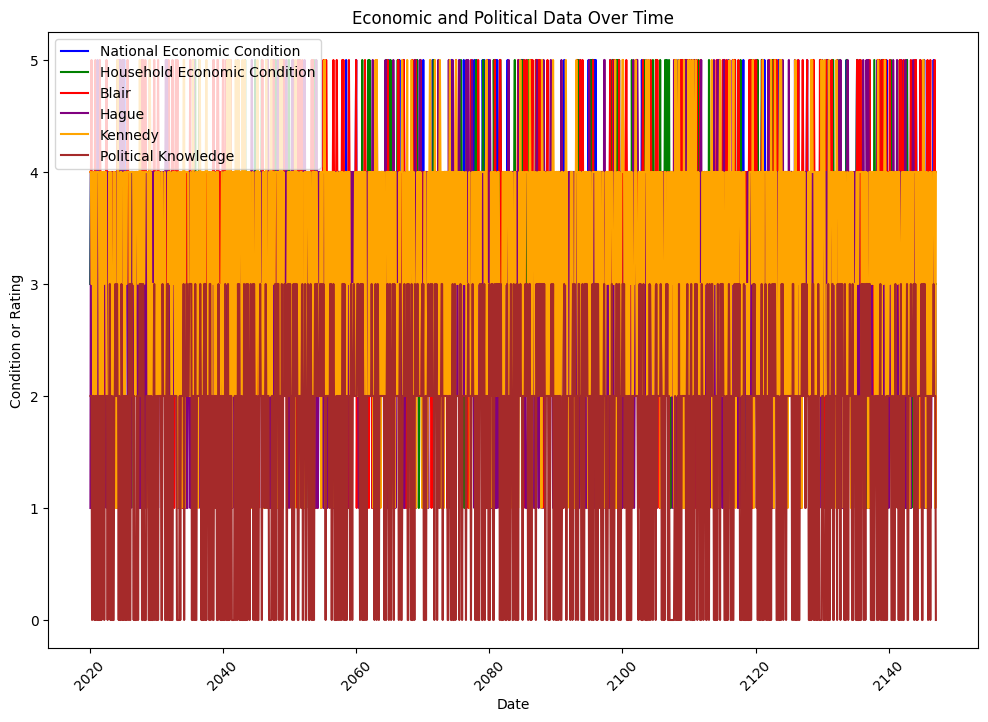

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['economic.cond.national'], label='National Economic Condition', color='blue')
plt.plot(data.index, data['economic.cond.household'], label='Household Economic Condition', color='green')
plt.plot(data.index, data['Blair'], label='Blair', color='red')
plt.plot(data.index, data['Hague'], label='Hague', color='purple')
plt.plot(data.index, data['Kennedy'], label='Kennedy', color='orange')
plt.plot(data.index, data['political.knowledge'], label='Political Knowledge', color='brown')
plt.title("Economic and Political Data Over Time")
plt.xlabel("Date")
plt.ylabel("Condition or Rating")
plt.legend()
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-b16d3d72ca13>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = numeric_data.resample('M').mean()


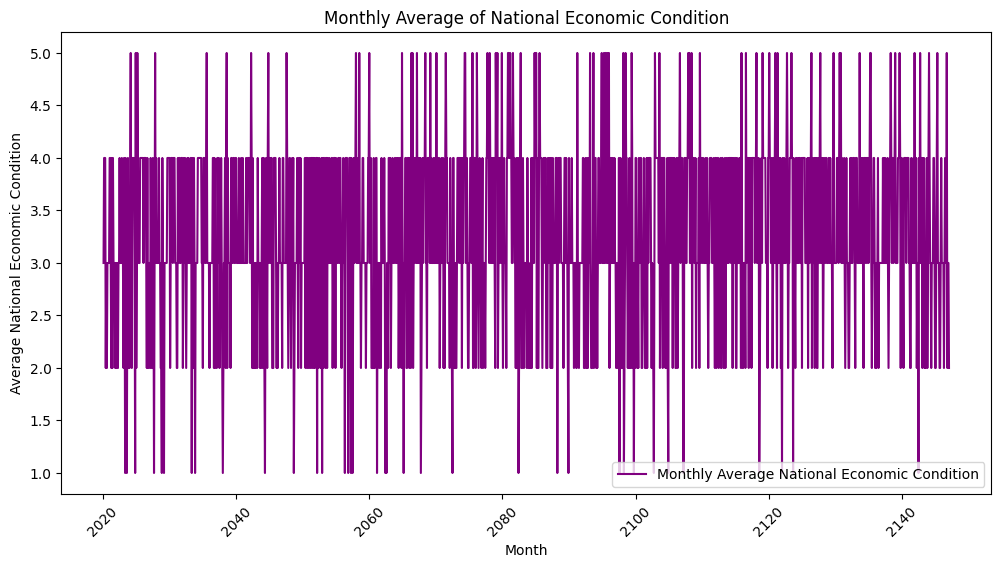

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

# Perform resampling and take the mean for numeric columns
monthly_data = numeric_data.resample('M').mean()

# Visualizing Resampled Data (monthly averages)
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['economic.cond.national'], label='Monthly Average National Economic Condition', color='purple')
plt.title("Monthly Average of National Economic Condition")
plt.xlabel("Month")
plt.ylabel("Average National Economic Condition")
plt.legend()
plt.xticks(rotation=45)
plt.show()

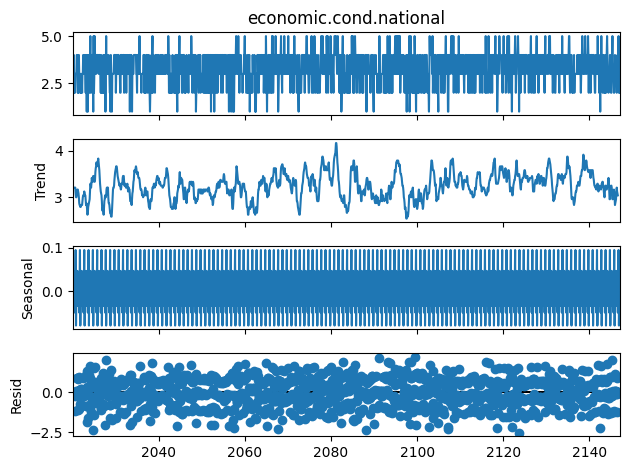

In [ ]:
# 5. Seasonal Decomposition for National Economic Condition (additive model)
result = seasonal_decompose(data['economic.cond.national'], model='additive', period=12)  # Set period=12 for monthly data (1 year)
result.plot()
plt.show()



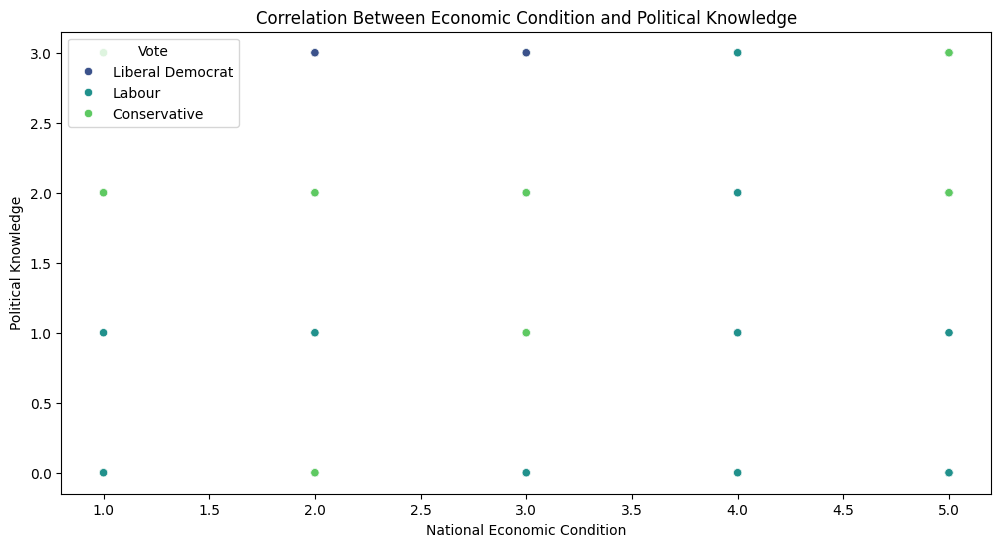

In [ ]:
# 6. Correlation Analysis between Key Variables (Scatter plots and Heatmap)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['economic.cond.national'], y=data['political.knowledge'], hue=data['vote'], palette='viridis')
plt.title("Correlation Between Economic Condition and Political Knowledge")
plt.xlabel("National Economic Condition")
plt.ylabel("Political Knowledge")
plt.legend(title='Vote', loc='upper left')
plt.show()

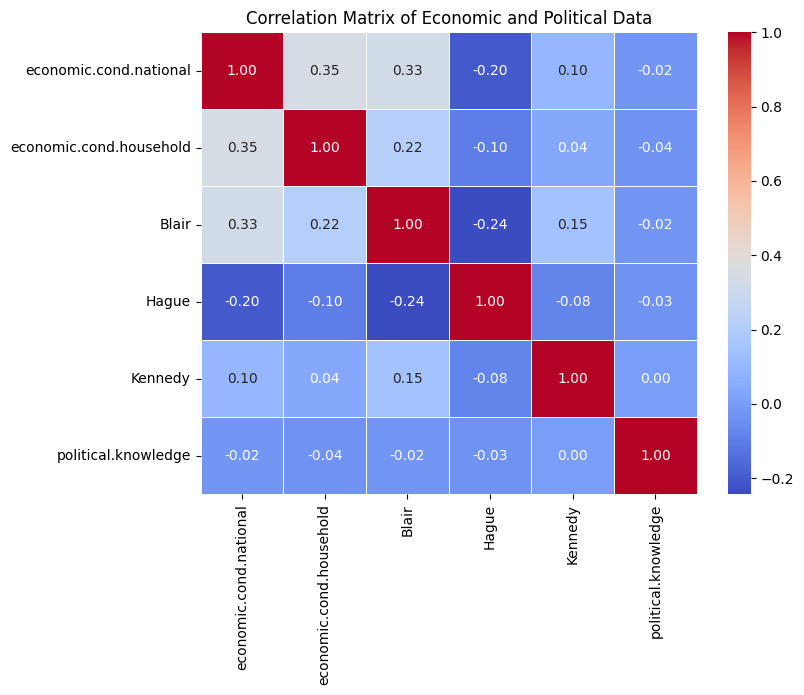

In [ ]:
correlation_matrix = data[['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Kennedy', 'political.knowledge']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Economic and Political Data")
plt.show()

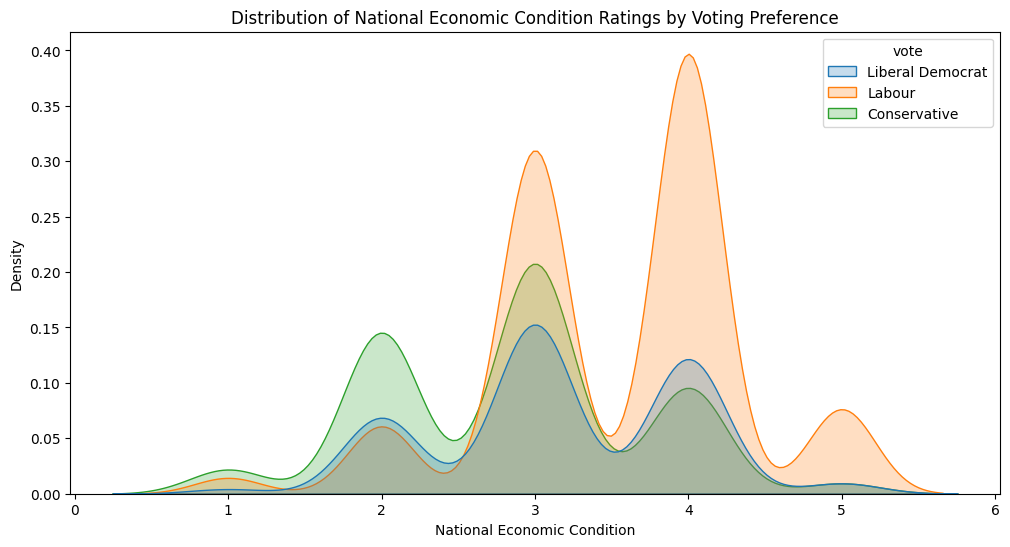

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='economic.cond.national', hue='vote', fill=True)
plt.title("Distribution of National Economic Condition Ratings by Voting Preference")
plt.xlabel("National Economic Condition")
plt.ylabel("Density")
plt.show()

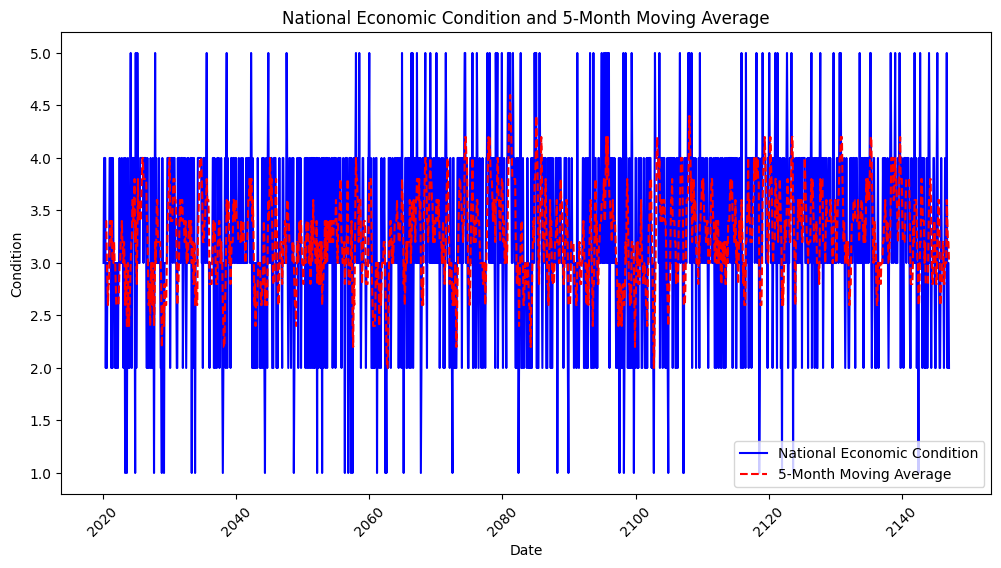

In [ ]:
# 8. Moving Averages (smoothing the data)
window_size = 5  # Define the window size for moving average (5 months)
data['National_Economic_MA'] = data['economic.cond.national'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['economic.cond.national'], label='National Economic Condition', color='blue')
plt.plot(data.index, data['National_Economic_MA'], label='5-Month Moving Average', color='red', linestyle='--')
plt.title("National Economic Condition and 5-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("Condition")
plt.legend()
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

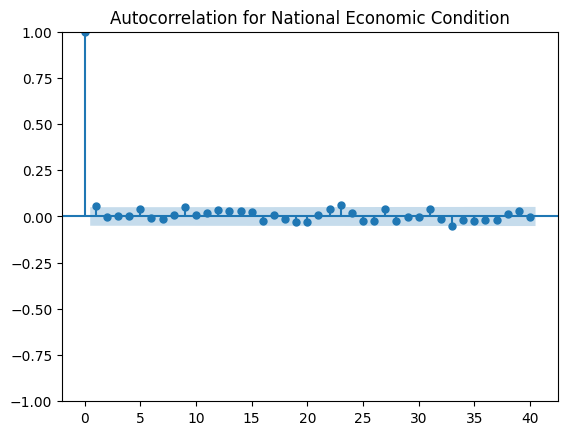

<Figure size 1200x600 with 0 Axes>

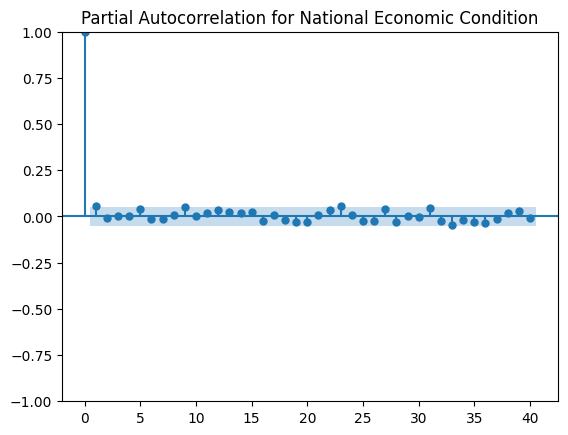

In [ ]:
# 9. Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 6))
plot_acf(data['economic.cond.national'], lags=40)  # Autocorrelation for 40 lags
plt.title("Autocorrelation for National Economic Condition")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['economic.cond.national'], lags=40)  # Partial Autocorrelation for 40 lags
plt.title("Partial Autocorrelation for National Economic Condition")
plt.show()

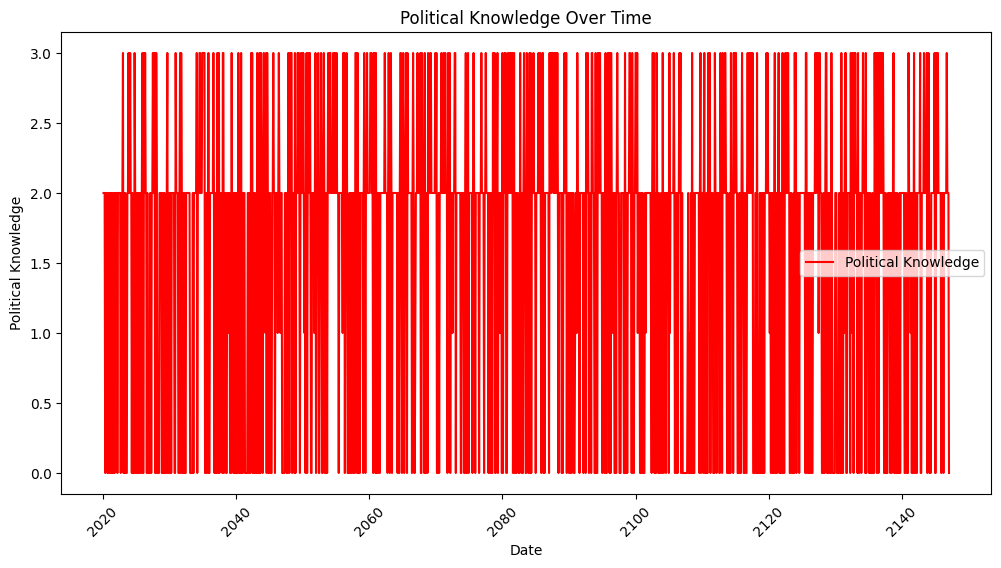

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['political.knowledge'], label='Political Knowledge', color='red')
plt.title("Political Knowledge Over Time")
plt.xlabel("Date")
plt.ylabel("Political Knowledge")
plt.legend()
plt.xticks(rotation=45)
plt.show()

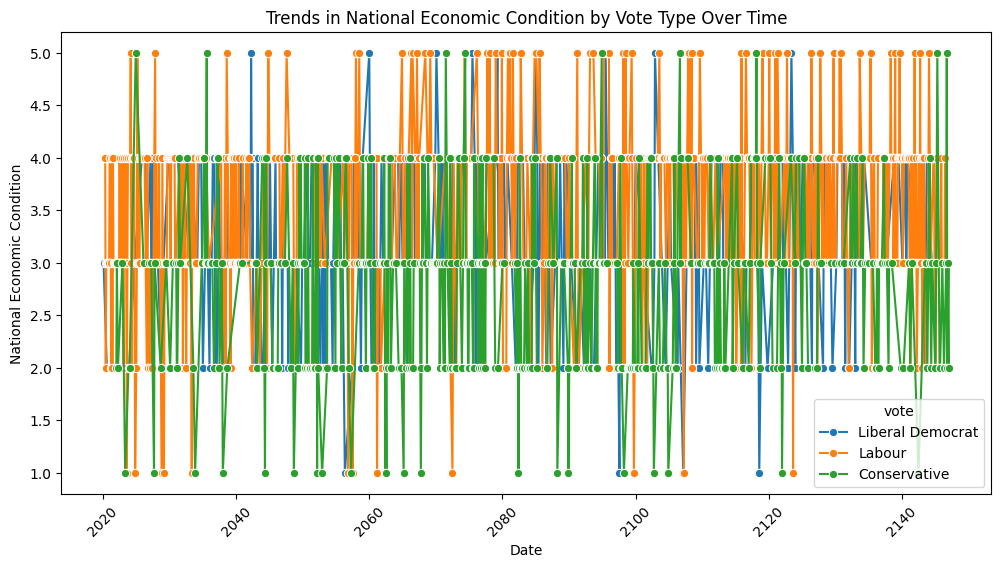

In [ ]:
# Group by 'vote' and 'DateTime' (or 'index'), then apply the mean for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Group by and apply mean only to numeric columns
vote_time_series = data.groupby([data.index, 'vote'])[numeric_columns].mean()

# Visualizing aggregated trends by vote
plt.figure(figsize=(12, 6))
sns.lineplot(data=vote_time_series, x=vote_time_series.index.get_level_values(0), y='economic.cond.national', hue='vote', marker='o')
plt.title("Trends in National Economic Condition by Vote Type Over Time")
plt.xlabel("Date")
plt.ylabel("National Economic Condition")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#  Spectral Clustering, Document Clustering, Minimum Spanning Tree Clustering, Model-based Clustering, and Outlier Detection
#Soumil Jain 21BDS0247

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('data_EDA.csv')

In [ ]:
# Preprocessing: Encoding categorical features and scaling numerical features
label_encoder = LabelEncoder()
data['vote'] = label_encoder.fit_transform(data['vote'])
data['gender'] = label_encoder.fit_transform(data['gender'])

# Select the relevant columns for clustering (excluding rownames)
features = data.drop(columns=['rownames'])

# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [ ]:
# 1. Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['Spectral_Cluster'] = spectral.fit_predict(scaled_data)

# 2. Document Clustering (KMeans as a proxy for document clustering)
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# 3. Minimum Spanning Tree Clustering (using DBSCAN, MST is built through density)
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# 4. Model-based Clustering (Expectation-Maximization using GaussianMixture)
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(scaled_data)

# 5. Hierarchical Agglomerative Clustering (with Ward's method)
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Agglo_Cluster'] = agglo.fit_predict(scaled_data)

# 6. Outlier Detection using DBSCAN
outliers = data[data['DBSCAN_Cluster'] == -1]

In [ ]:
# PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Add PCA components as columns in the data DataFrame
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]


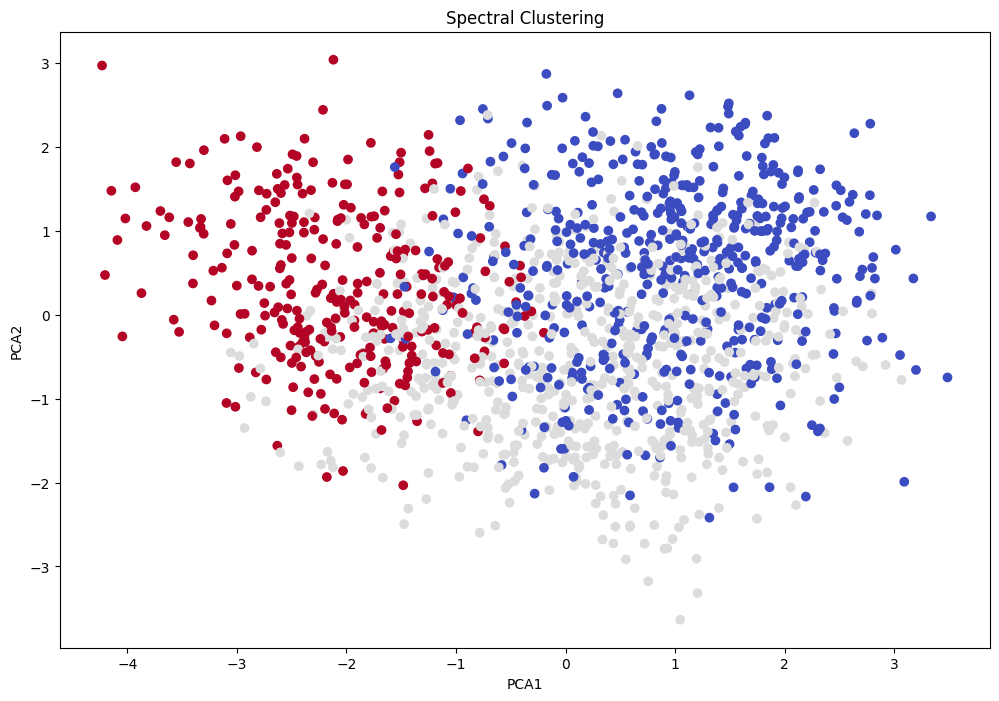

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Spectral_Cluster'], cmap='coolwarm')
plt.title('Spectral Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

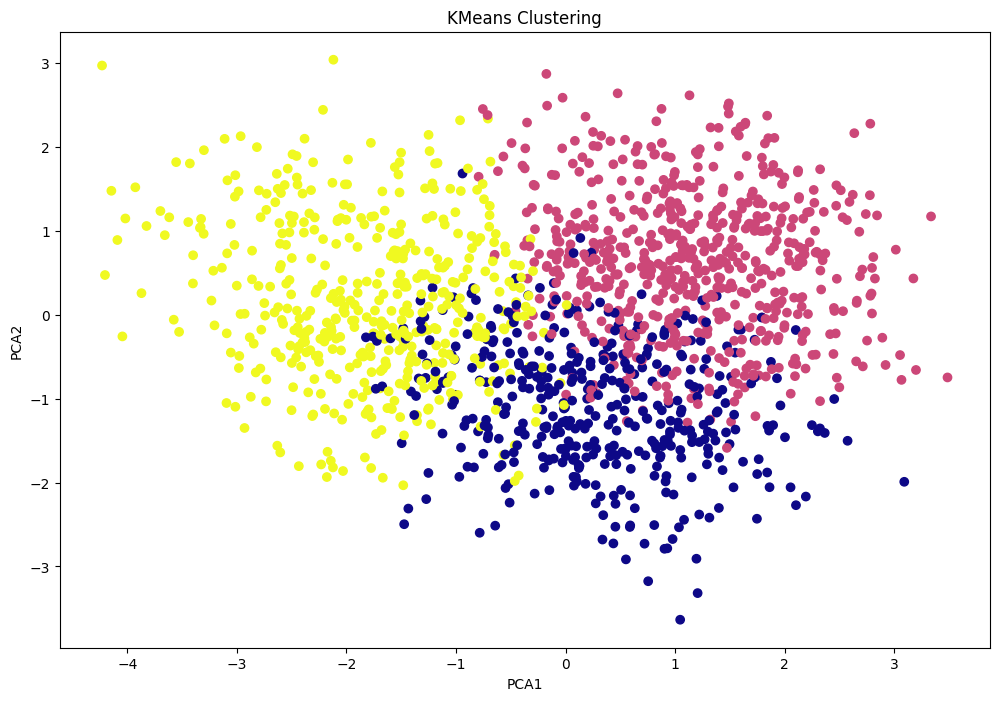

In [ ]:
# Plot for KMeans Clustering
plt.figure(figsize=(12, 8))
plt.scatter(data['PCA1'], data['PCA2'], c=data['KMeans_Cluster'], cmap='plasma')
plt.title('KMeans Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

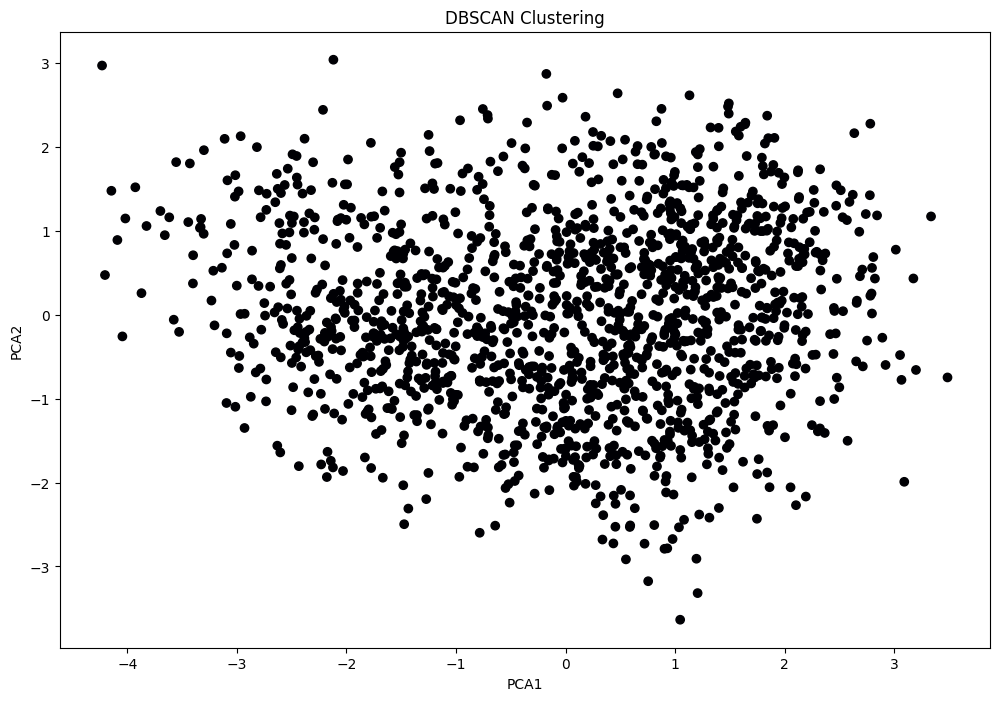

In [ ]:
# Plot for DBSCAN Clustering
plt.figure(figsize=(12, 8))
plt.scatter(data['PCA1'], data['PCA2'], c=data['DBSCAN_Cluster'], cmap='inferno')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

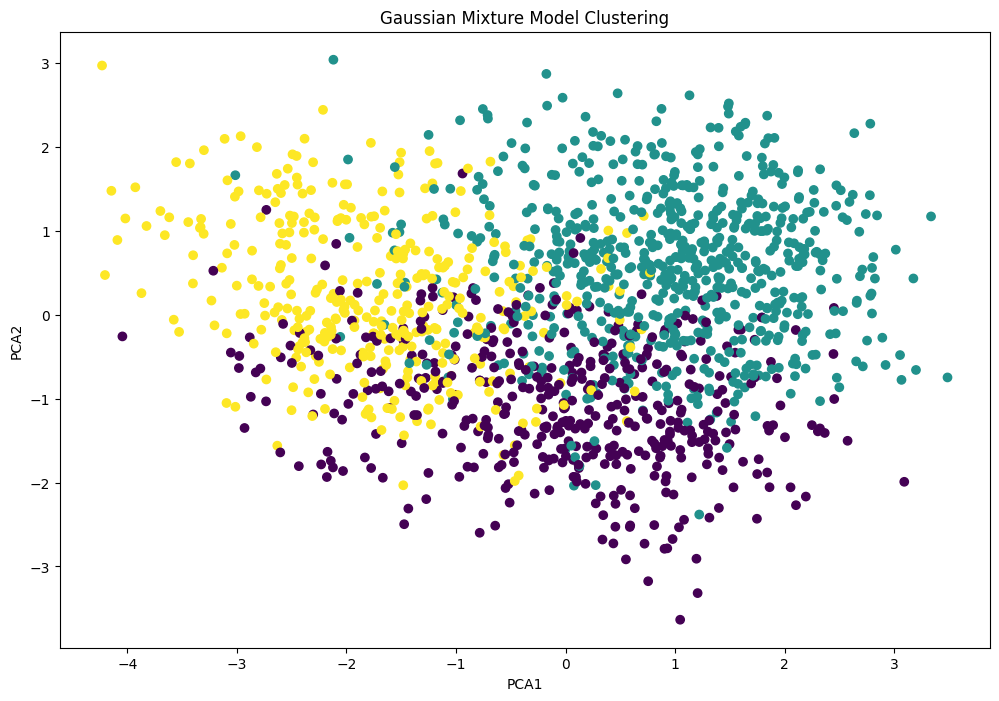

In [ ]:
# Plot for Gaussian Mixture Model Clustering
plt.figure(figsize=(12, 8))
plt.scatter(data['PCA1'], data['PCA2'], c=data['GMM_Cluster'], cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

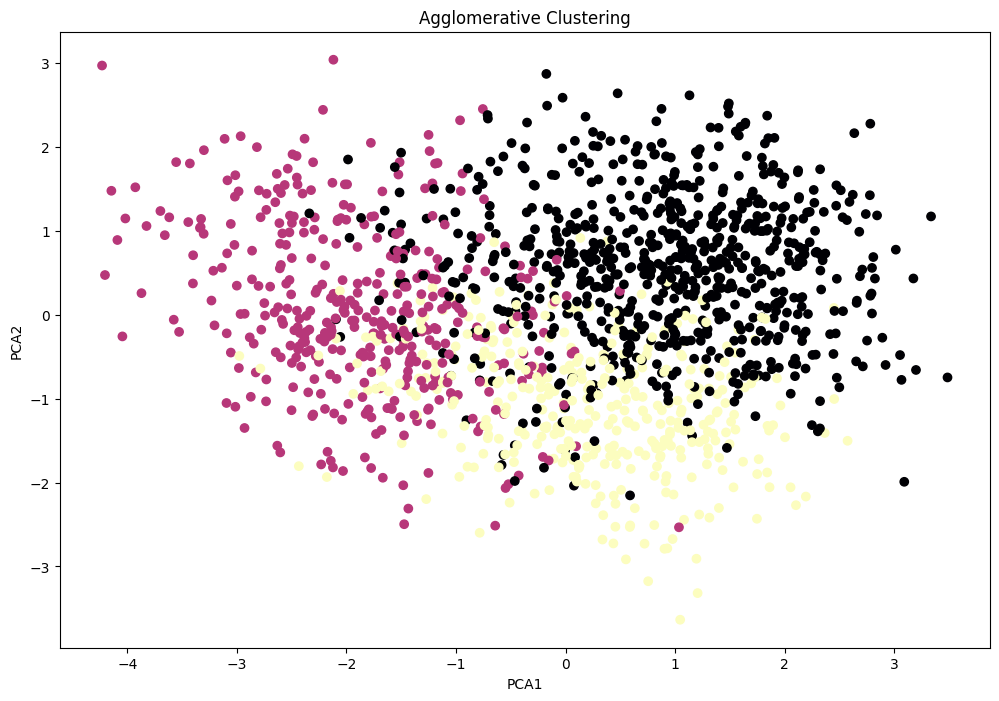

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Agglo_Cluster'], cmap='magma')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
# 8. Calculate Silhouette Score (for evaluating clustering performance)
silhouette_spectral = silhouette_score(scaled_data, data['Spectral_Cluster'])
silhouette_kmeans = silhouette_score(scaled_data, data['KMeans_Cluster'])

# DBSCAN may only have one cluster (-1 for outliers), so skip silhouette calculation if only one cluster is found
if len(np.unique(data['DBSCAN_Cluster'])) > 1:
    silhouette_dbscan = silhouette_score(scaled_data, data['DBSCAN_Cluster'])
else:
    silhouette_dbscan = "N/A (Single cluster)"

silhouette_gmm = silhouette_score(scaled_data, data['GMM_Cluster'])
silhouette_agglo = silhouette_score(scaled_data, data['Agglo_Cluster'])

print("Silhouette Score for Spectral Clustering:", silhouette_spectral)
print("Silhouette Score for KMeans:", silhouette_kmeans)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)
print("Silhouette Score for GMM:", silhouette_gmm)
print("Silhouette Score for Agglomerative Clustering:", silhouette_agglo)

Silhouette Score for Spectral Clustering: 0.11654068169575216
Silhouette Score for KMeans: 0.14541484899812077
Silhouette Score for DBSCAN: N/A (Single cluster)
Silhouette Score for GMM: 0.13817531843209796
Silhouette Score for Agglomerative Clustering: 0.11962583934770214


In [ ]:
### Principal Component Analysis
# Soumil Jain 21BDS0247

In [ ]:
!pip install minisom
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import MDS
from sklearn.mixture import GaussianMixture
from minisom import MiniSom
from sklearn.decomposition import FactorAnalysis

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=0303d982e9f3977d017b74938ec1a8e70888c939fc7c043d350ef81807ebf057
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
data = pd.read_csv("data_EDA.csv")

In [ ]:
data = data.drop(columns=['rownames'])

In [ ]:
le = LabelEncoder()
data['vote'] = le.fit_transform(data['vote'])
data['gender'] = le.fit_transform(data['gender'])


In [ ]:
X = data.drop(columns=['vote'])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# ------------------------------------------------------
# Linear Methods
# ------------------------------------------------------

In [ ]:


# 3.1. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
print(pca_df.head())  # Print the first few rows of PCA results

# 3.2. Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Create a DataFrame with the SVD results
svd_df = pd.DataFrame(X_svd, columns=['SVD1', 'SVD2'])
print(svd_df.head())  # Print the first few rows of SVD results

# 3.3. Factor Analysis
factor = FactorAnalysis(n_components=2)
X_factor = factor.fit_transform(X_scaled)

# Create a DataFrame with the Factor Analysis results
factor_df = pd.DataFrame(X_factor, columns=['Factor1', 'Factor2'])
print(factor_df.head())  # Print the first few rows of Factor Analysis results

# 3.4. Intrinsic Dimensionality Estimation (using Gaussian Mixture Model as an approximation)
gmm = GaussianMixture(n_components=2)
gmm.fit(X_scaled)
X_gmm = gmm.predict_proba(X_scaled)

       PCA1      PCA2
0  1.376028  0.555952
1  1.215346  0.602191
2  2.343248  0.926801
3  0.165929 -0.250420
4 -1.071800  2.033151
       SVD1      SVD2
0  1.376028  0.555952
1  1.215346  0.602191
2  2.343248  0.926801
3  0.165929 -0.250420
4 -1.071800  2.033151
    Factor1   Factor2
0 -0.764694 -0.947289
1 -0.715285  0.175367
2 -1.337150 -0.213430
3 -0.260927 -0.336370
4  0.779536 -1.235707


In [ ]:

# ------------------------------------------------------
# Non-Linear Methods
# ------------------------------------------------------

In [ ]:
# 4.1. Multidimensional Scaling (MDS)
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_scaled)

# Create a DataFrame with the MDS results
mds_df = pd.DataFrame(X_mds, columns=['MDS1', 'MDS2'])
print(mds_df.head())  # Print the first few rows of MDS results

# 4.2. Manifold Learning (using Isomap as an example)
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

# Create a DataFrame with the Isomap results
isomap_df = pd.DataFrame(X_isomap, columns=['Isomap1', 'Isomap2'])
print(isomap_df.head())  # Print the first few rows of Isomap results

       MDS1      MDS2
0  1.602014  1.266065
1  1.563453  1.307011
2  2.464640  1.559281
3 -0.454810  3.700016
4 -2.289170  2.907727
    Isomap1   Isomap2
0 -7.162250 -3.761755
1  8.431045  0.340266
2  8.251080 -4.559916
3 -6.416375  1.155621
4  8.098436  3.779183


In [ ]:
# 4.3. Self-Organizing Maps (SOM)
# Initialize SOM
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X_scaled, num_iteration=1000)

# Get the SOM results (output nodes)
som_output = np.array([som.winner(x) for x in X_scaled])
som_df = pd.DataFrame(som_output, columns=['SOM_x', 'SOM_y'])
print(som_df.head())  # Print the first few rows of SOM results


   SOM_x  SOM_y
0      7      1
1      8      4
2      2      6
3      1      9
4      7      4


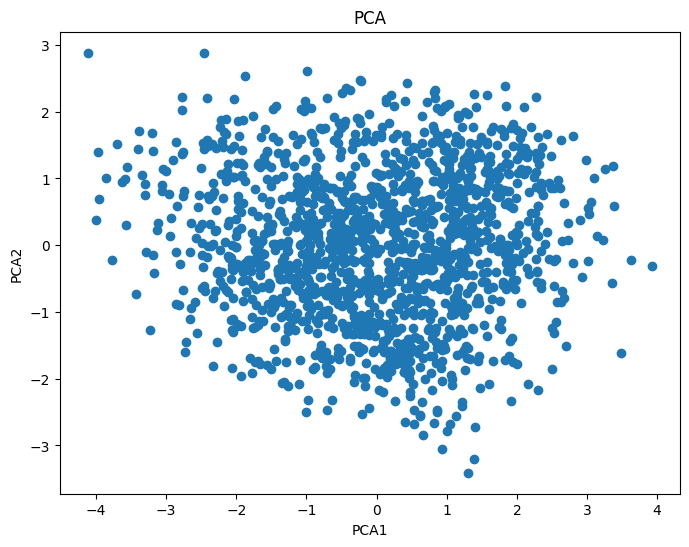

In [ ]:
import matplotlib.pyplot as plt

# Visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

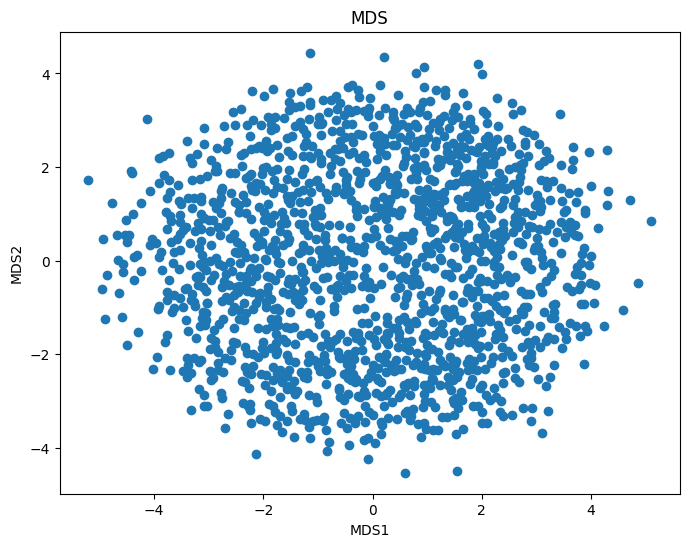

In [ ]:
# Visualize MDS result
plt.figure(figsize=(8, 6))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'])
plt.title('MDS')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()


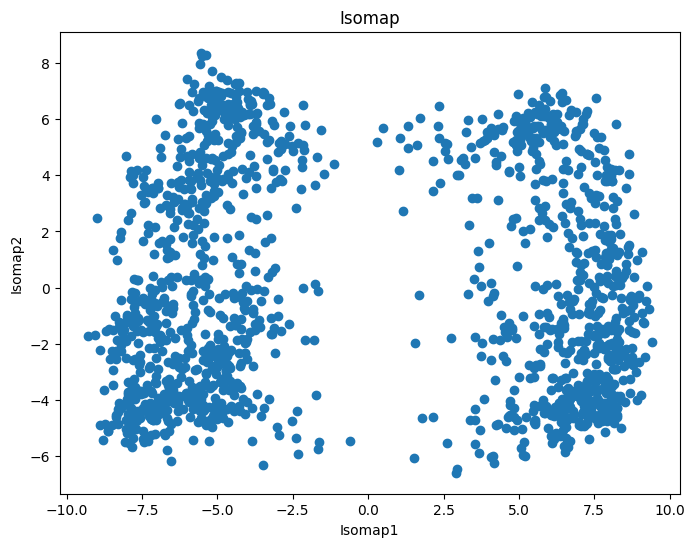

In [ ]:
# Visualize Isomap result
plt.figure(figsize=(8, 6))
plt.scatter(isomap_df['Isomap1'], isomap_df['Isomap2'])
plt.title('Isomap')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.show()

In [ ]:
# Linear regression model
# 21BDS0247 Soumil Jain


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
data = pd.read_csv('data_EDA.csv')

In [ ]:
label_encoder_vote = LabelEncoder()
label_encoder_gender = LabelEncoder()
data['vote'] = label_encoder_vote.fit_transform(data['vote'])
data['gender'] = label_encoder_gender.fit_transform(data['gender'])

In [ ]:
features = data.drop(columns=['rownames'])

In [ ]:
X = features.drop(columns=['age'])
y = features['age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 12.824488634356296
Mean Squared Error (MSE): 227.08120993838392
Root Mean Squared Error (RMSE): 15.069213978784159
R-squared (R2): 0.019698374690275244


<ipython-input-139-d49e471a61ef>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


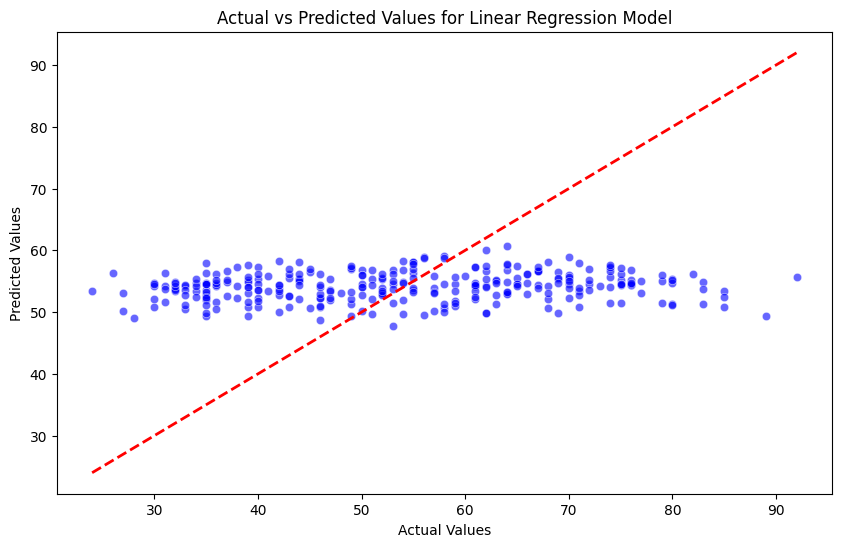

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", edgecolor='w', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Linear Regression Model")
plt.show()


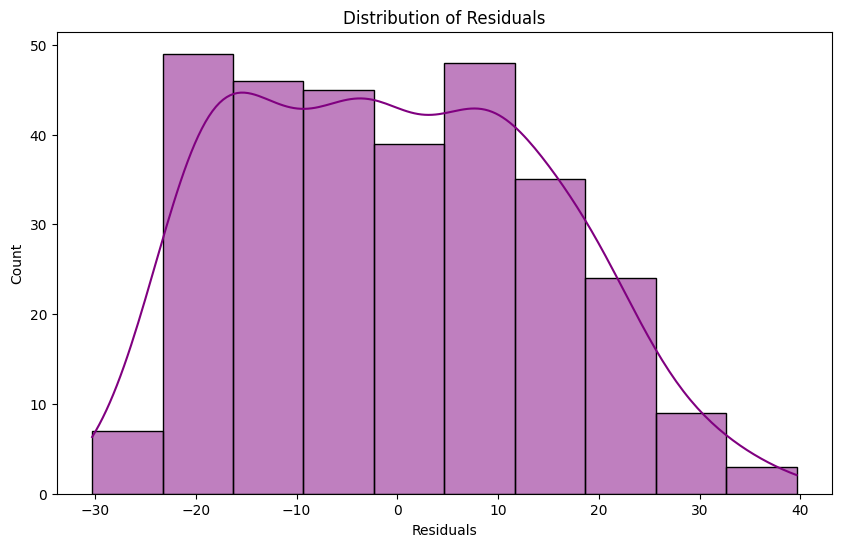

In [ ]:
# Distribution of errors (Residuals)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

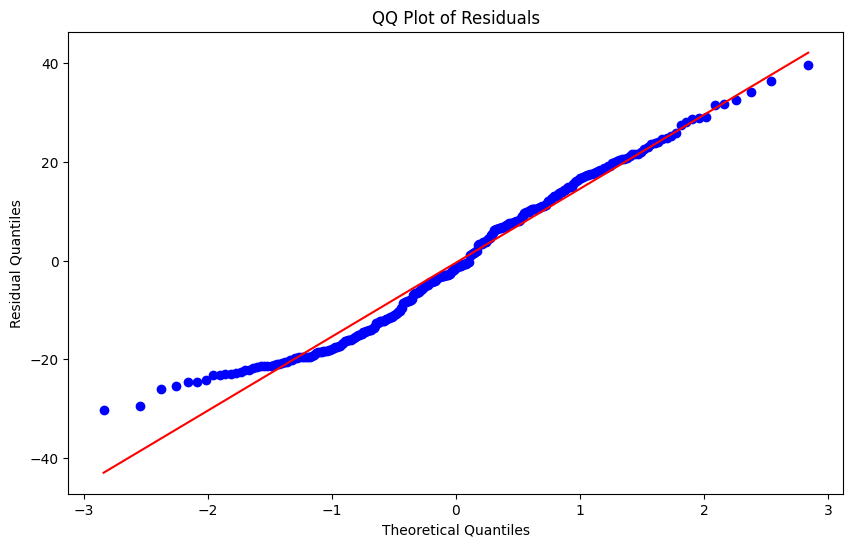

In [ ]:
# 2. QQ Plot of Residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.ylabel("Residual Quantiles")
plt.xlabel("Theoretical Quantiles")
plt.show()